In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bc = pd.read_csv('bearing_classes.csv', sep=';')
print(bc.shape)
bc.head()

(113, 2)


,bearing_id,status
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [3]:
print(bc.status.unique())

[1 0]


In [4]:
bs = pd.read_csv('bearing_signals.csv')
print(bs.shape)
bs.head()

(10265700, 13)


,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,0,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,0,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,0,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,0,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,0,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [5]:
print(bs.bearing_1_id.unique())

[0]


In [6]:
print(bs.bearing_2_id.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112]


In [7]:
print(bs.experiment_id.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112]


In [8]:
bs = bs.drop('bearing_1_id', axis=1)
bs.head()

,experiment_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [9]:
bs.rename(columns={'bearing_2_id': 'bearing_id'}, inplace=True)
bs.head()

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [10]:
bs['experiment_id'].value_counts()

20    166500
61    147900
25    121800
97    114300
24    112200
       ...  
83     77400
29     74700
73     73500
32     72000
81     70200
Name: experiment_id, Length: 112, dtype: int64

In [11]:
df = pd.merge(bs, bc, on='bearing_id')
df.head()

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w,status
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006,0
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243,0
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369,0
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520,0
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175,0


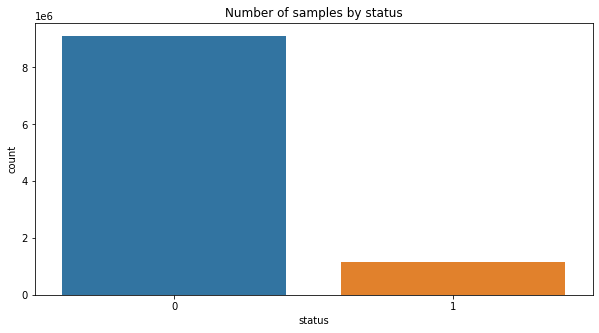

In [12]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'status', data = df)
plt.title('Number of samples by status')
plt.show()

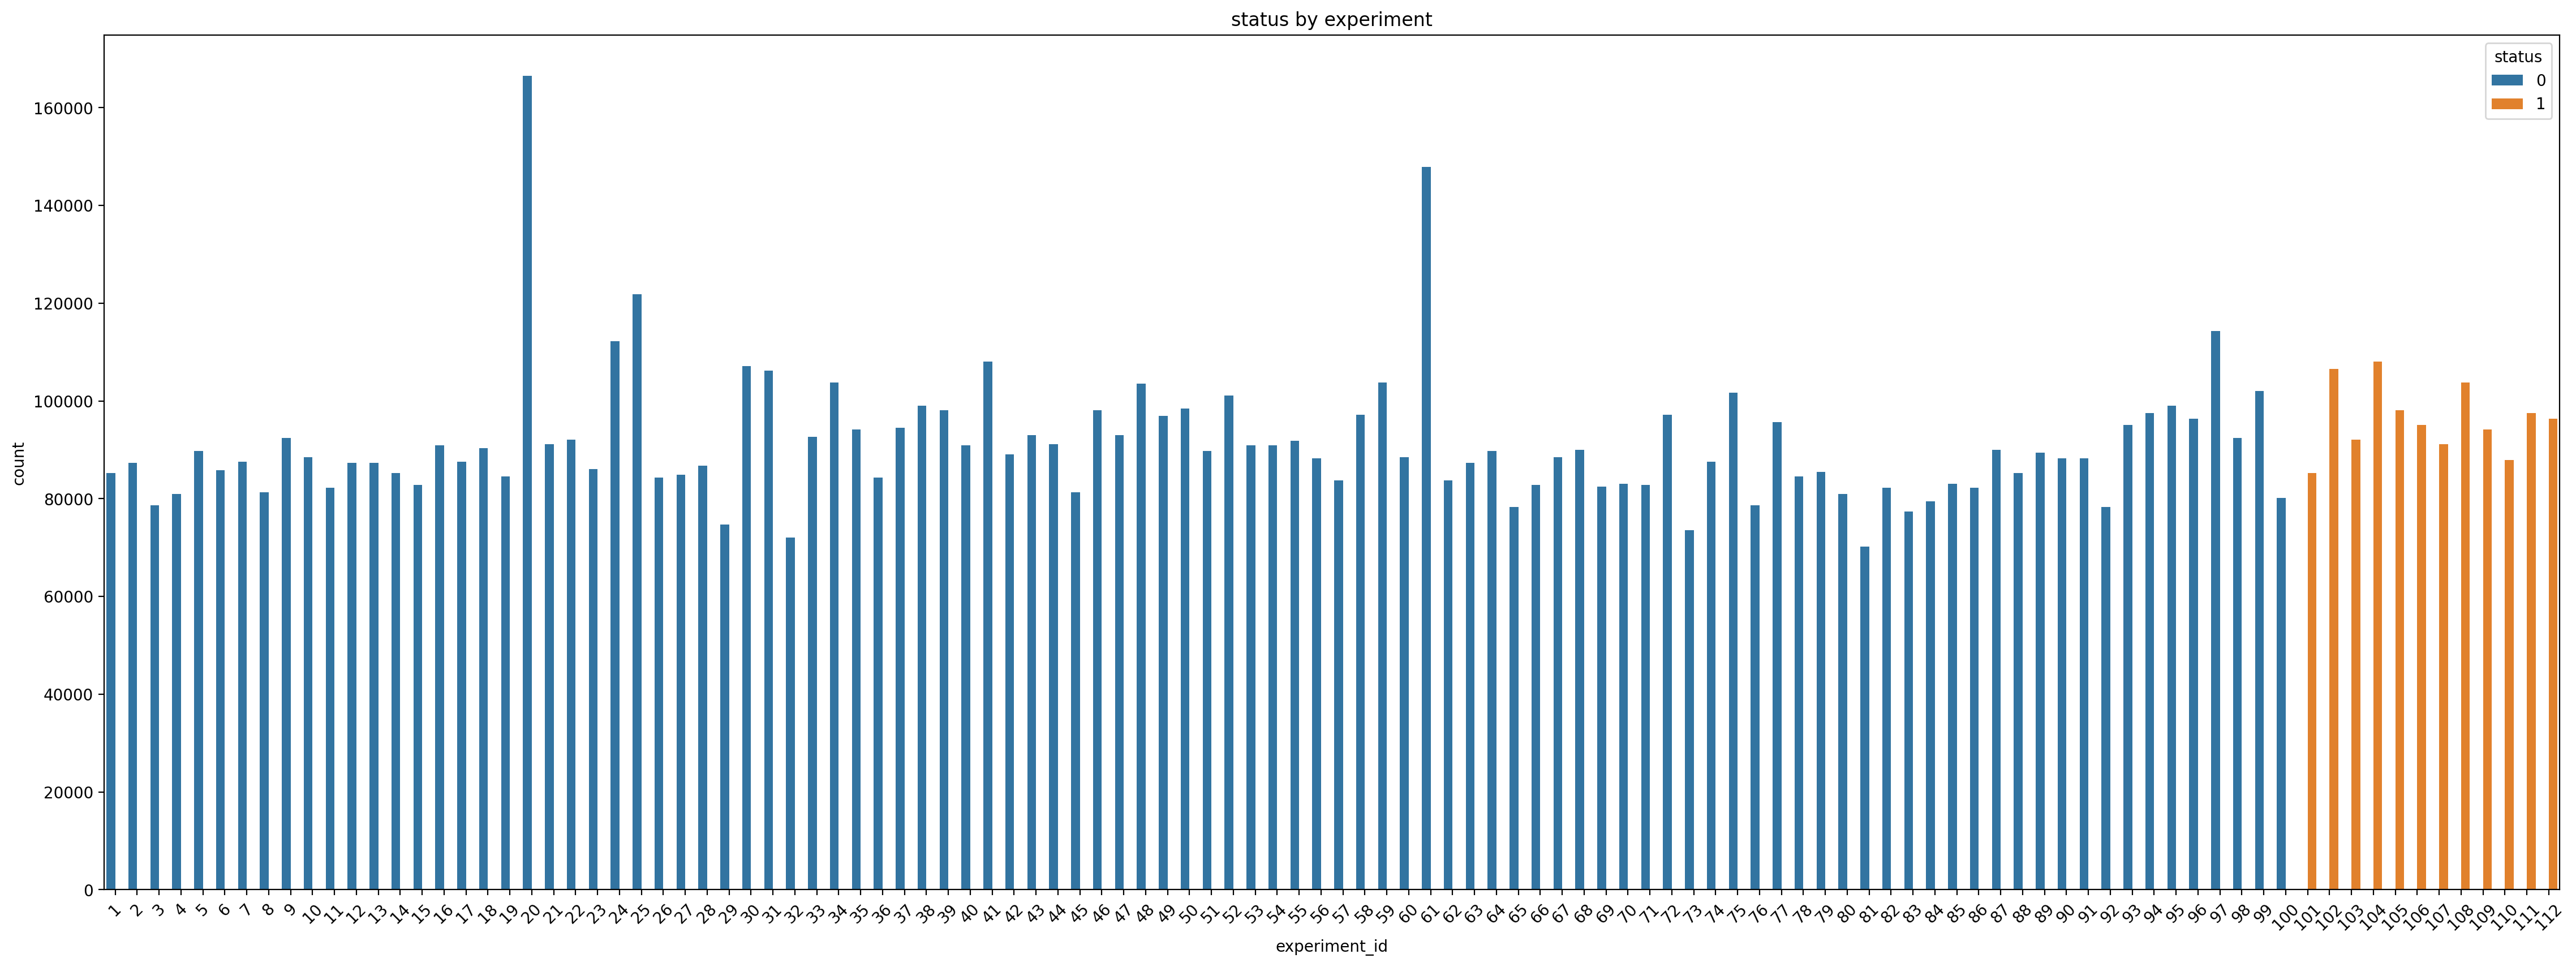

In [13]:
plt.figure(figsize = (28, 10), dpi=200)
sns.countplot(x = 'experiment_id', hue = 'status', data = df)
plt.title('status by experiment')
plt.xticks(rotation=45)
plt.show()

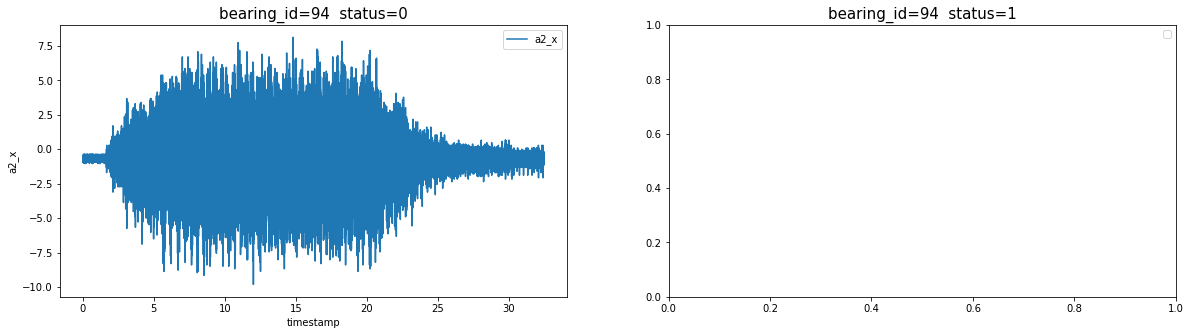

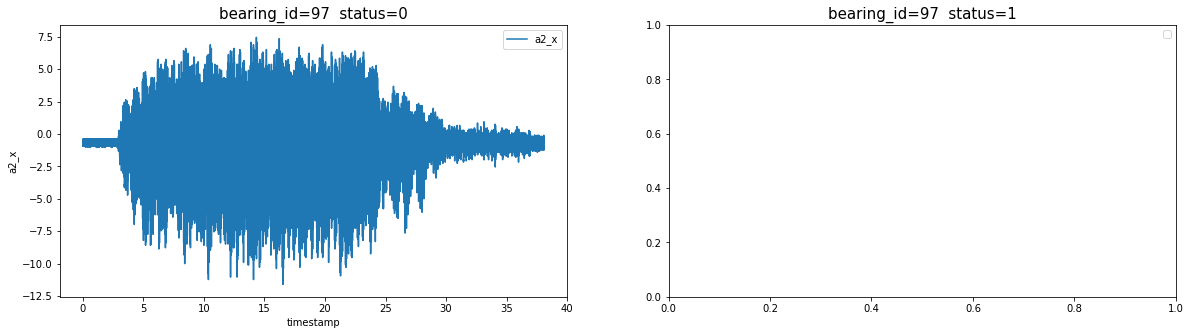

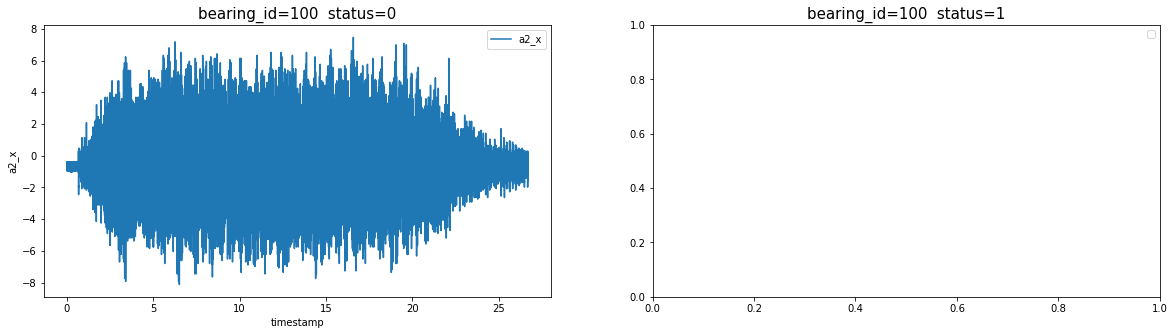

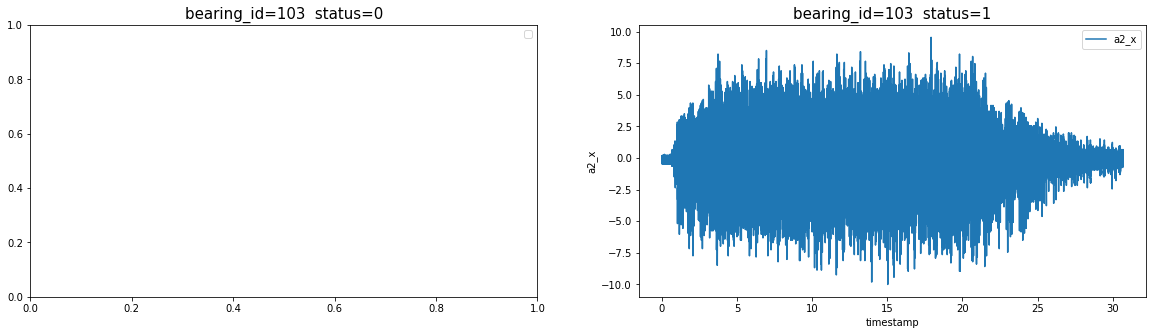

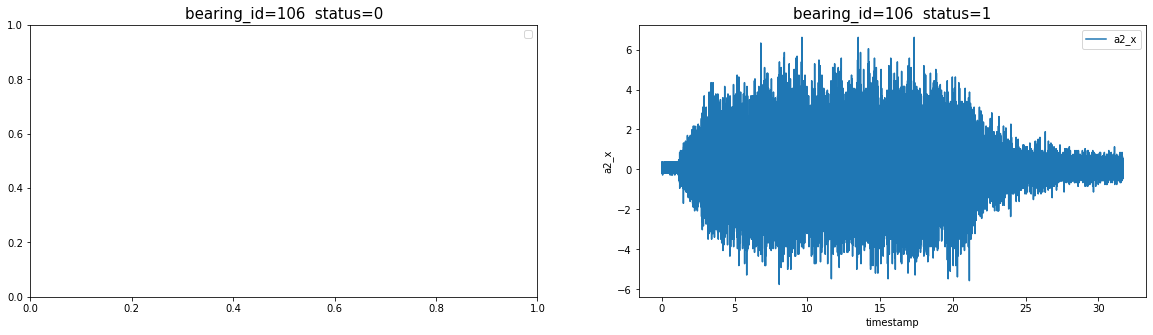

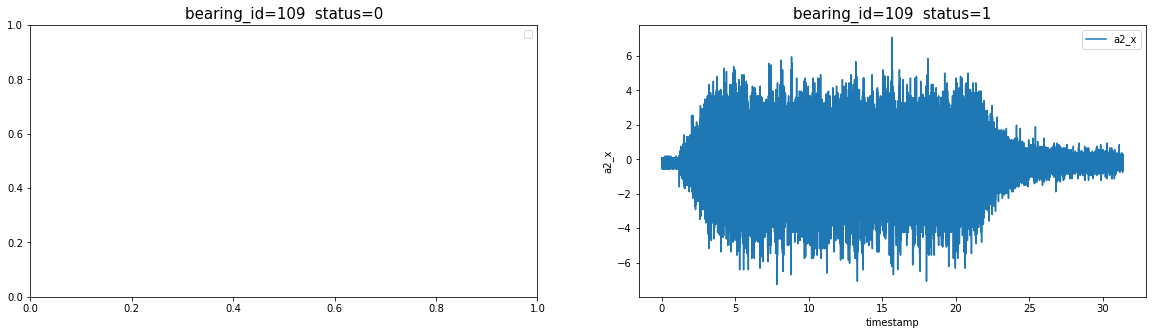

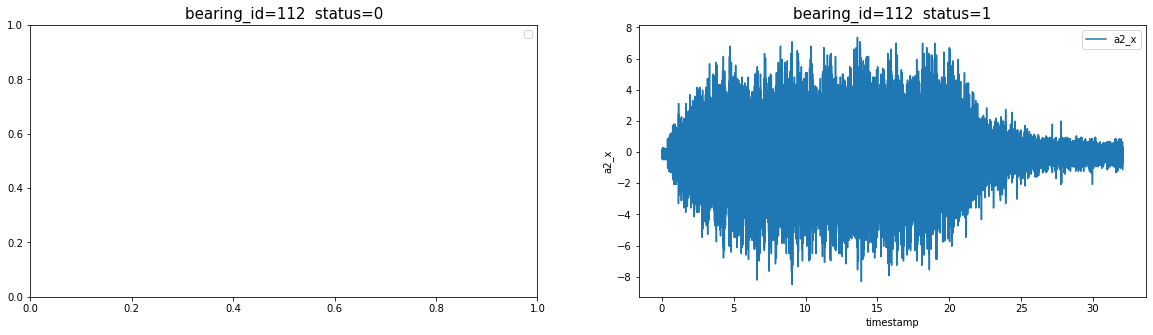

In [14]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_x', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['a2_x'])
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_x', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['a2_x'])
    plt.show()

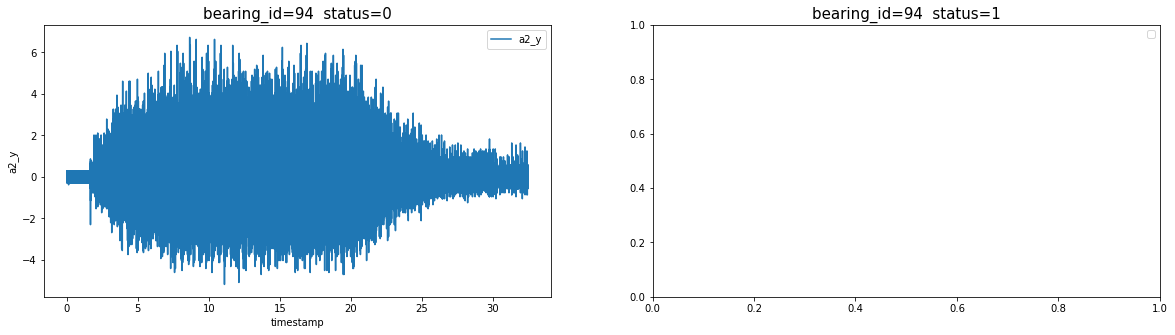

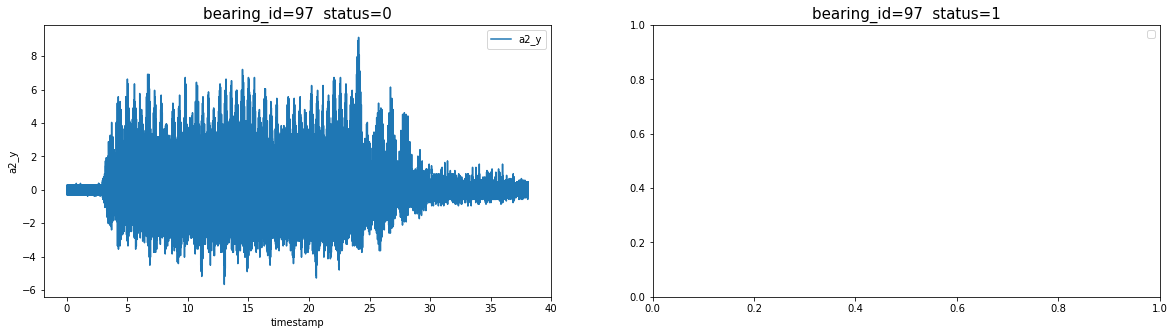

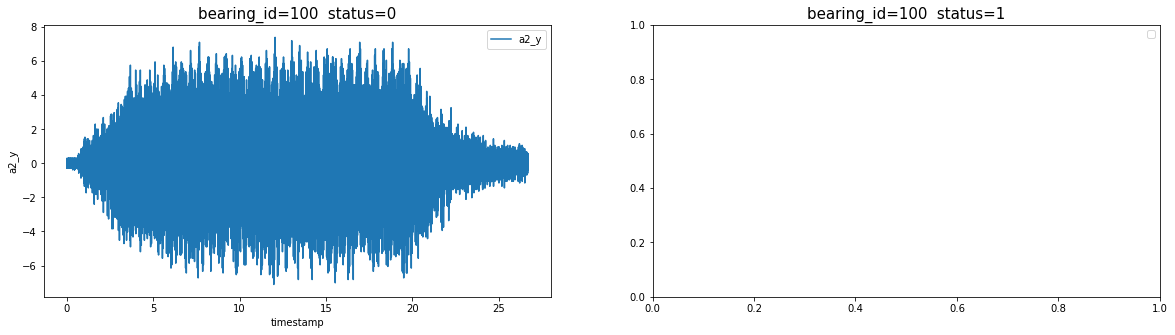

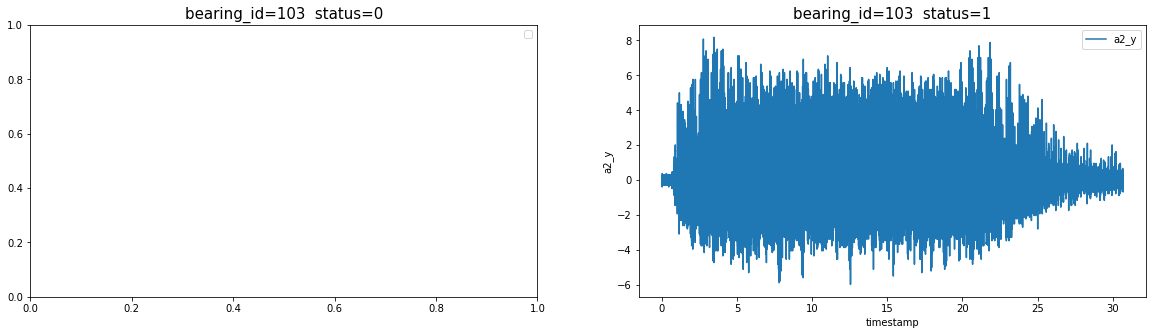

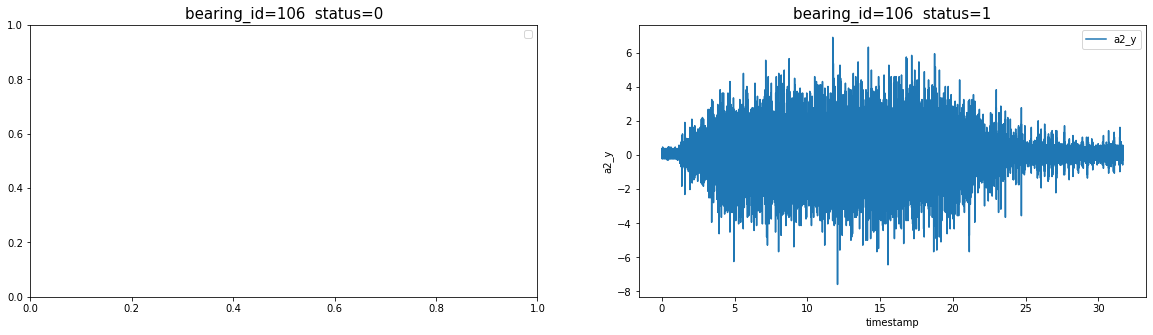

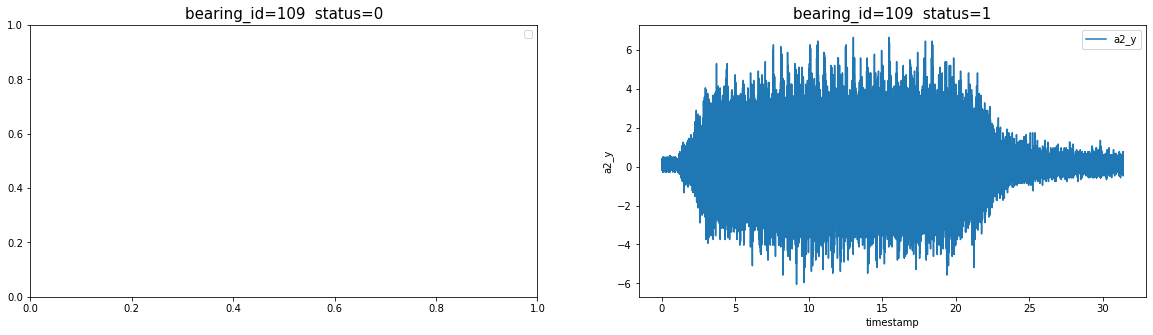

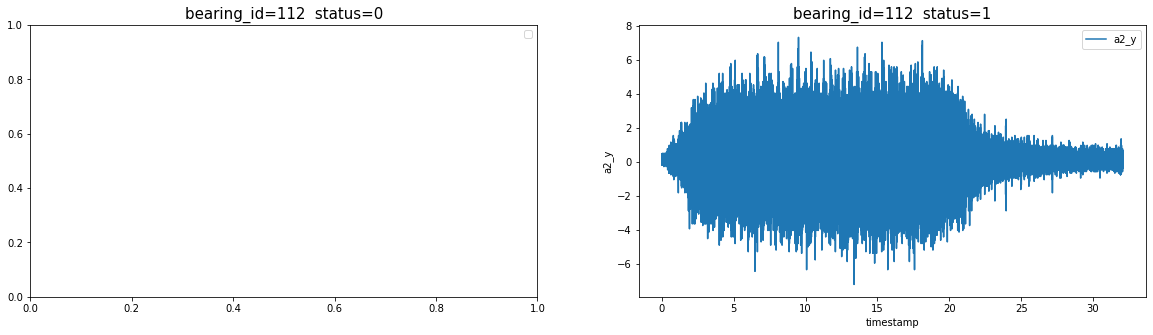

In [15]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_y', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['a2_y'])
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_y', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['a2_y'])
    plt.show()

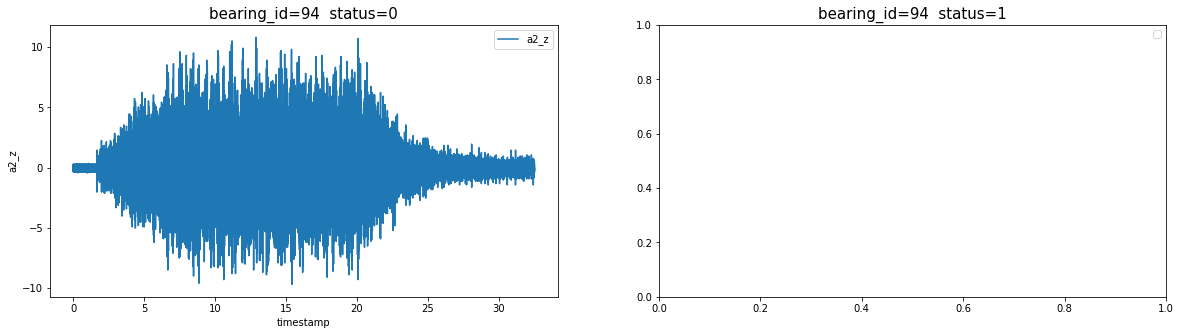

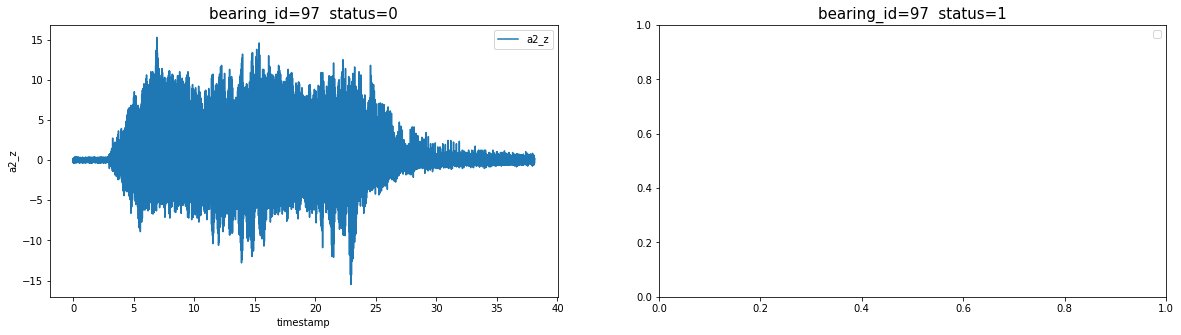

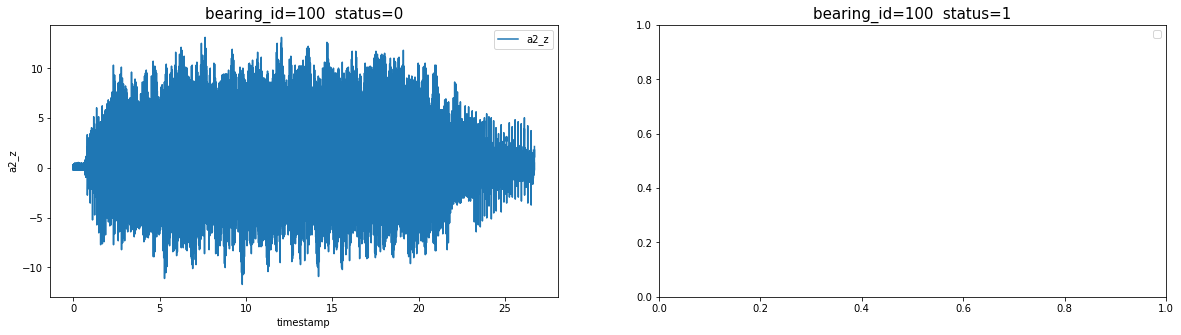

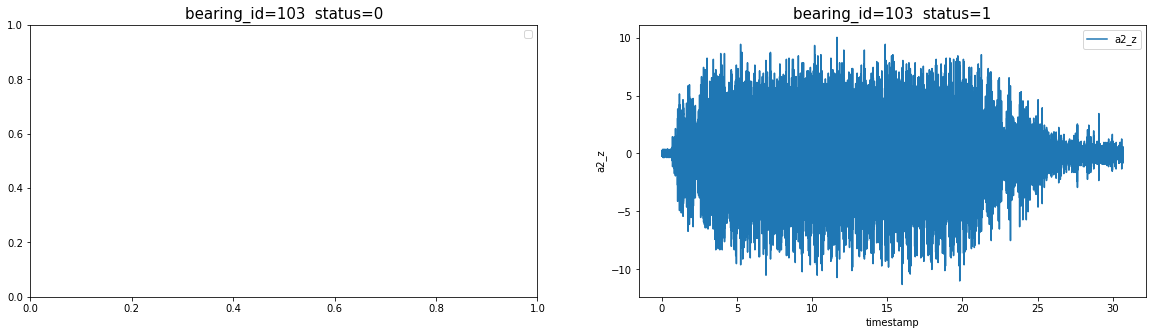

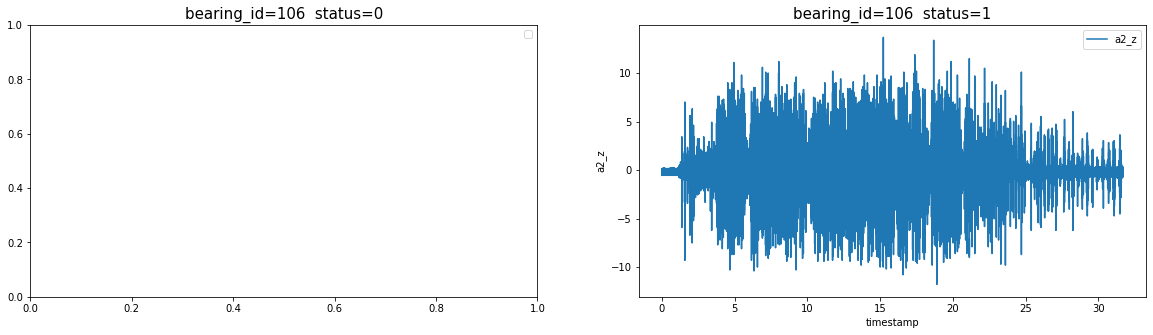

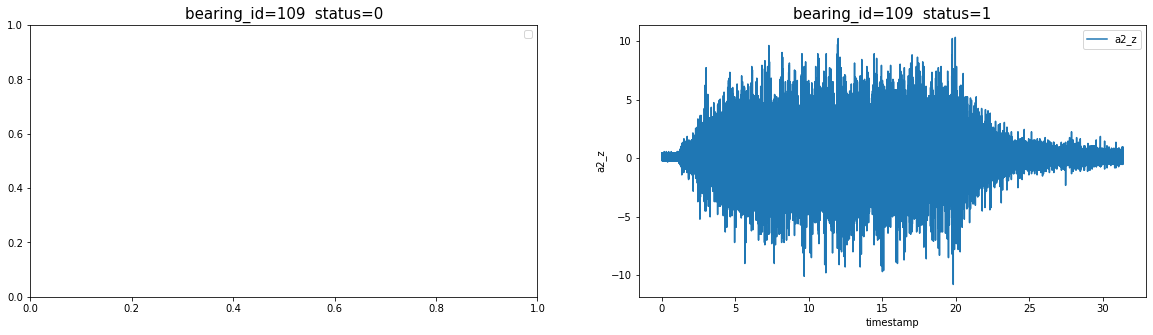

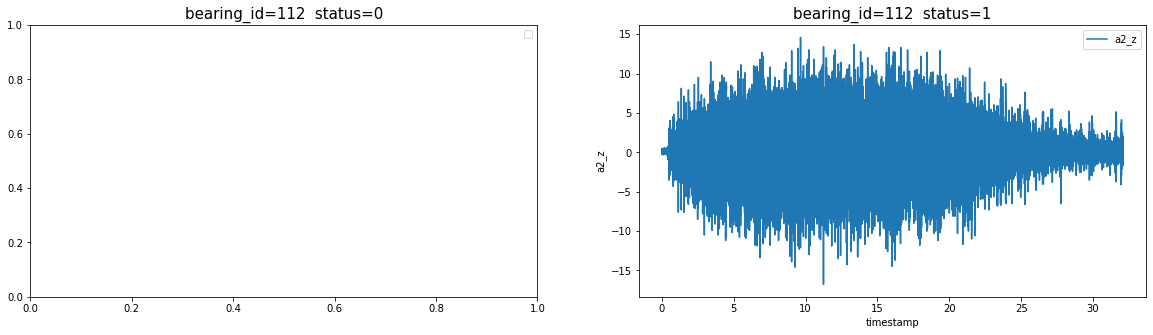

In [16]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_z', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['a2_z'])
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_z', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['a2_z'])
    plt.show()

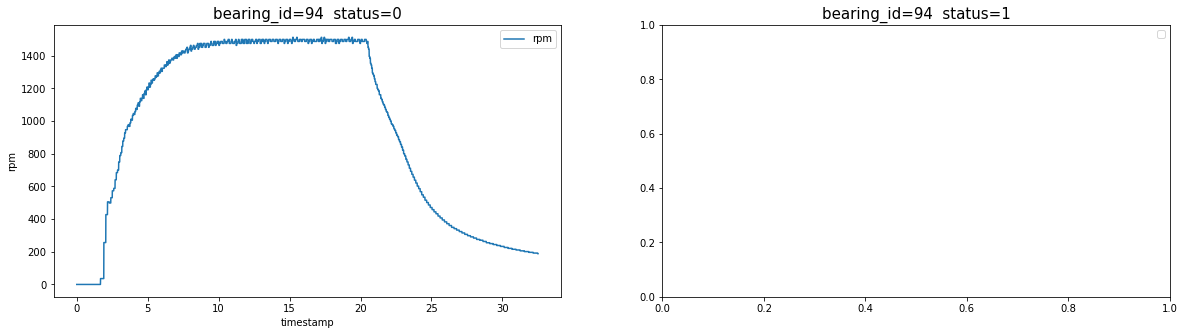

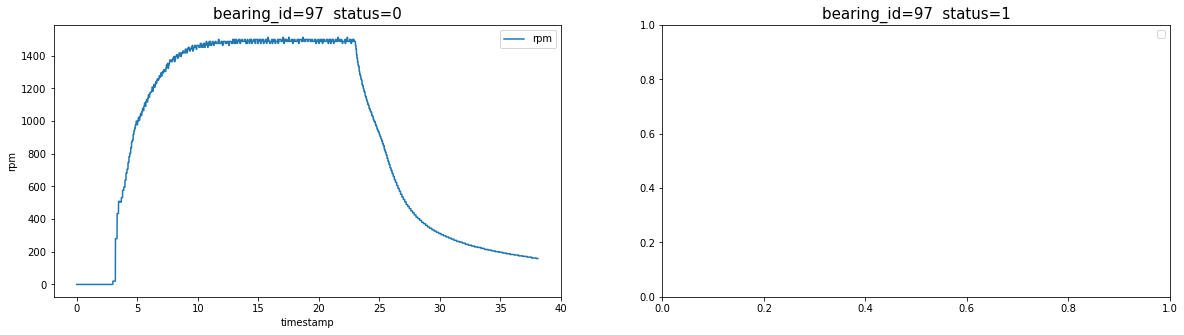

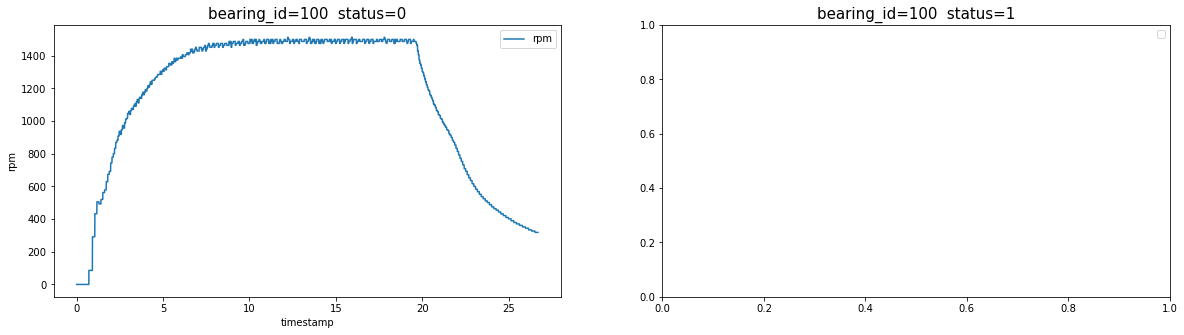

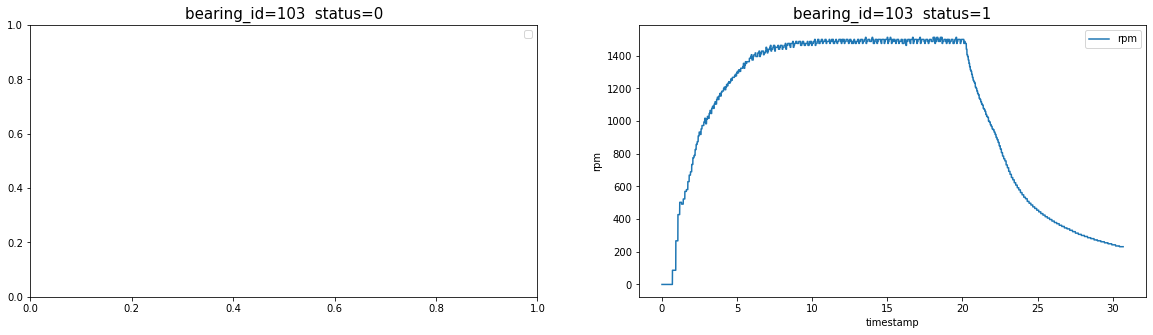

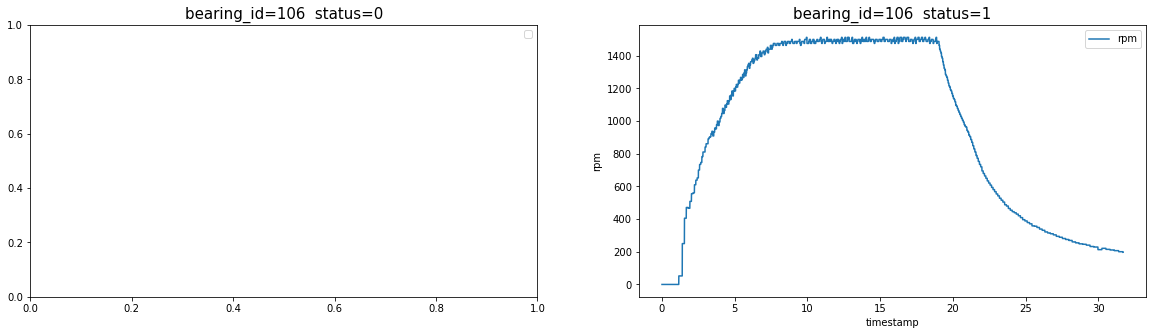

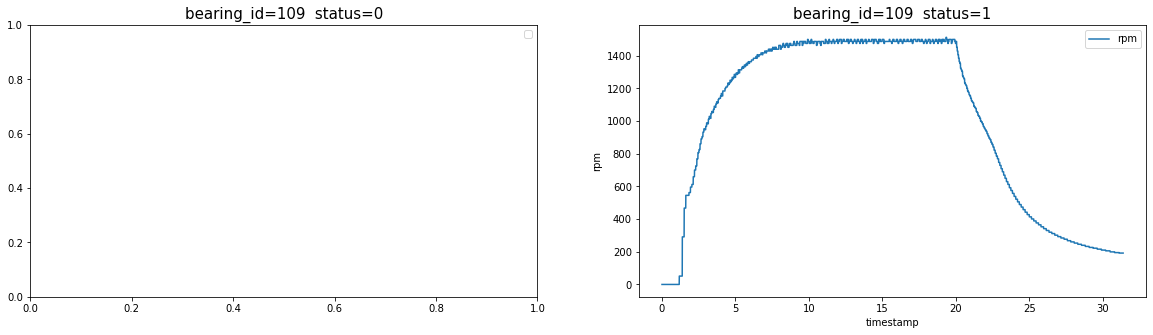

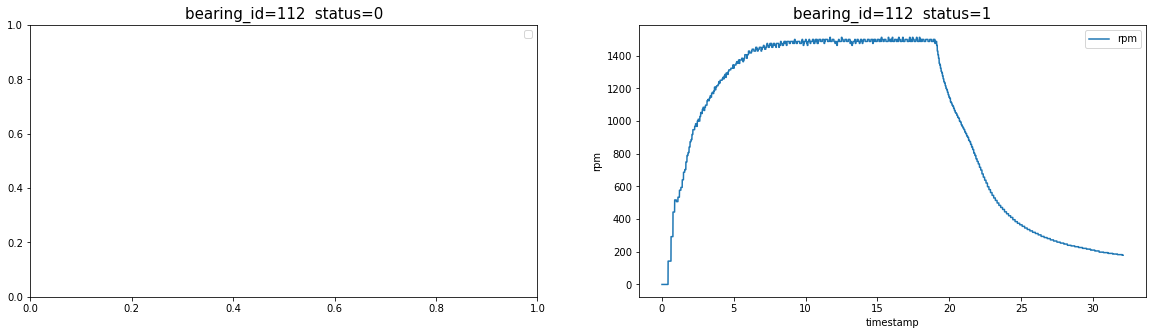

In [17]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['rpm'])
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['rpm'])
    plt.show()

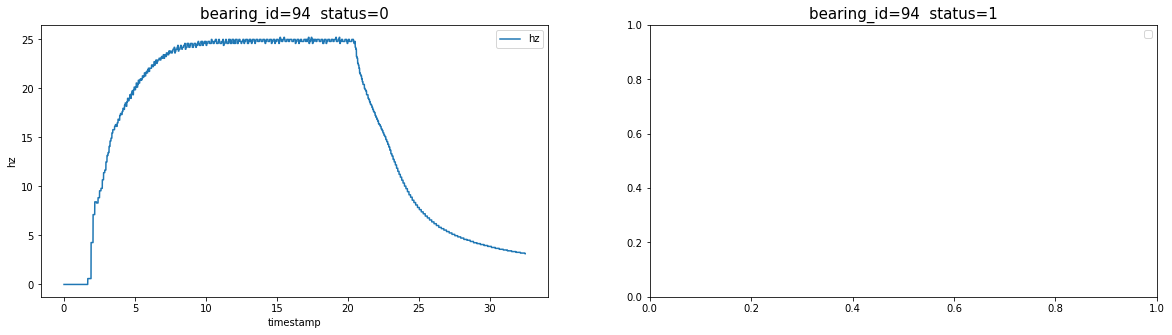

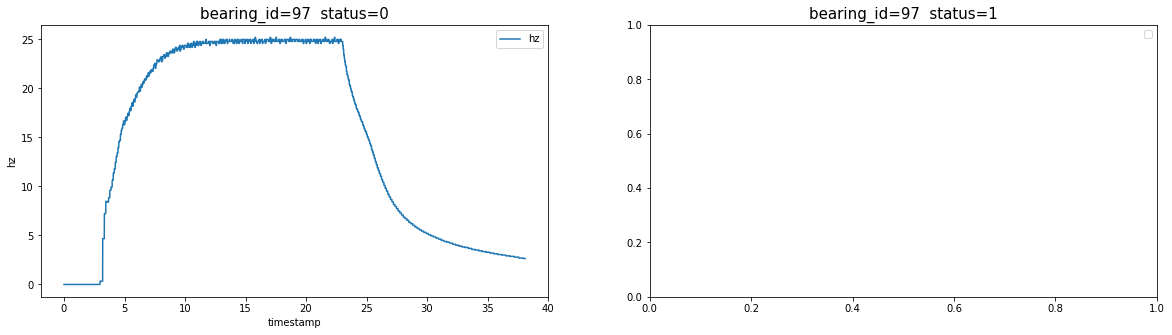

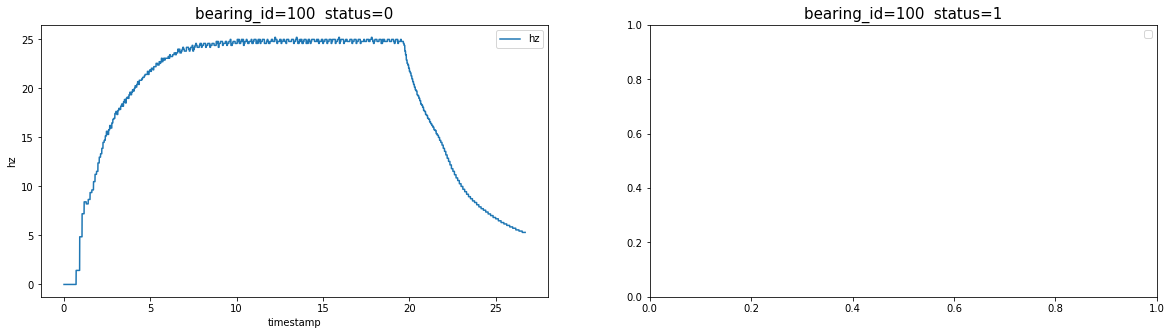

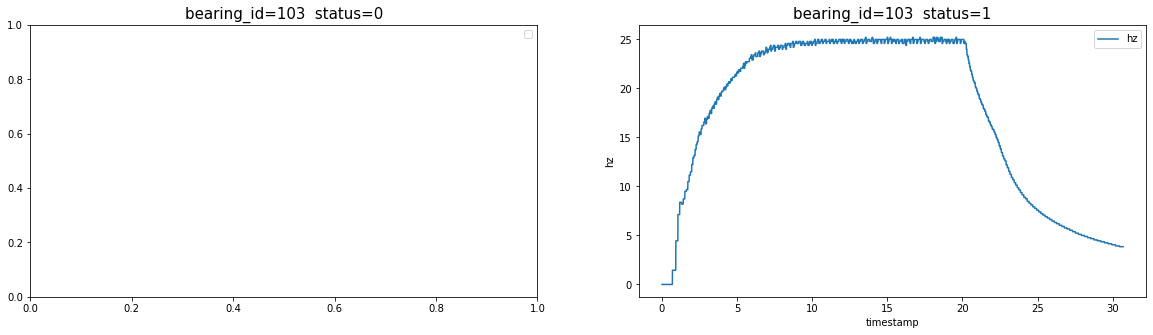

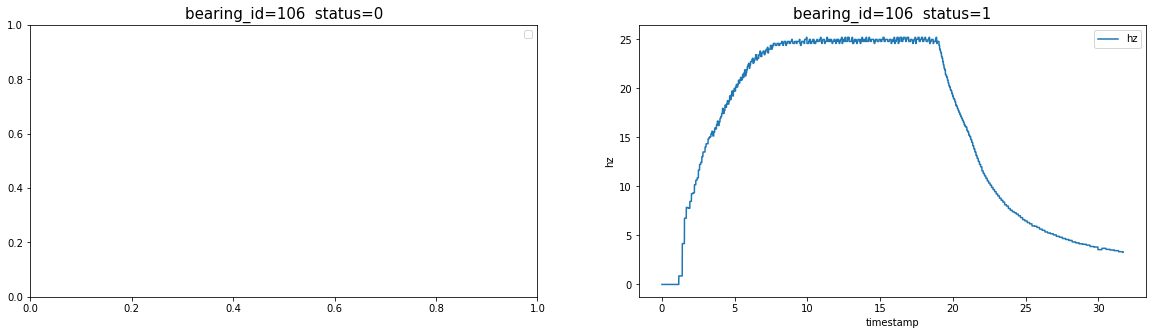

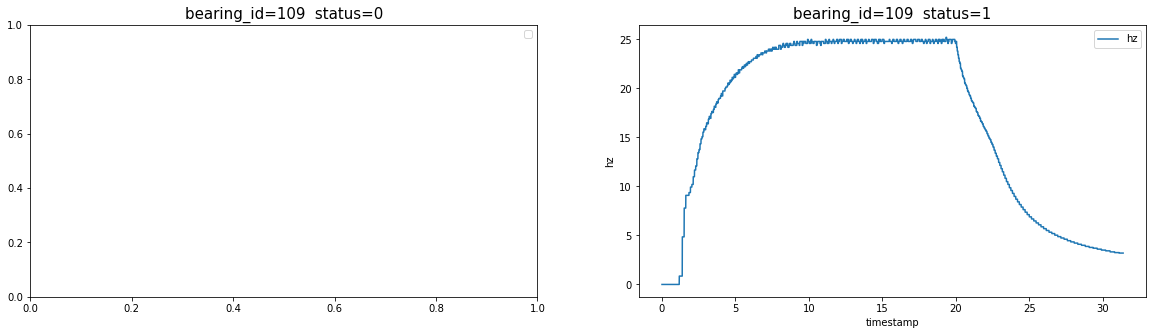

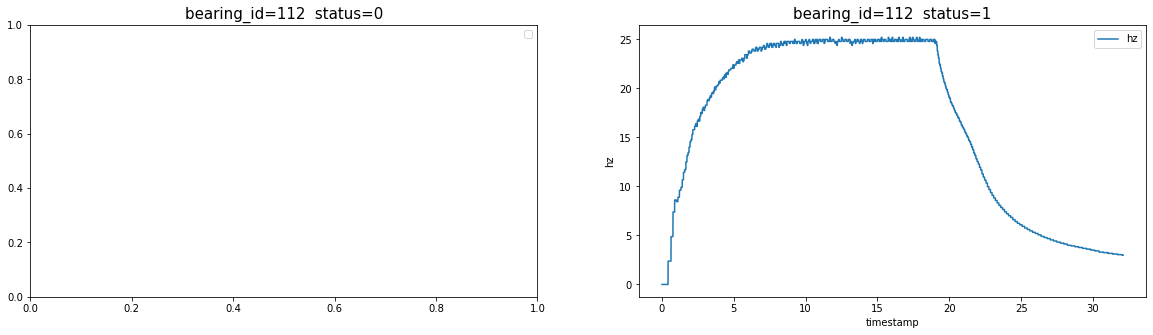

In [18]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'hz', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['hz'])
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'hz', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['hz'])
    plt.show()

In [19]:
df2 = df[df['rpm'] > 1450]
df2.shape

(4142153, 13)

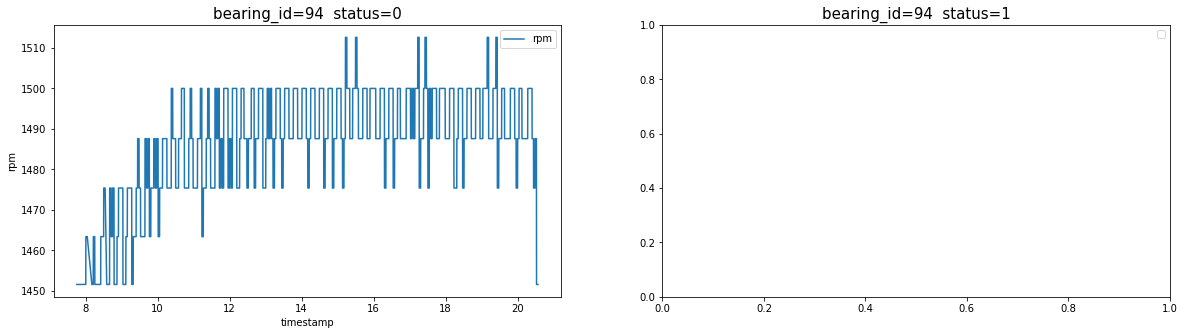

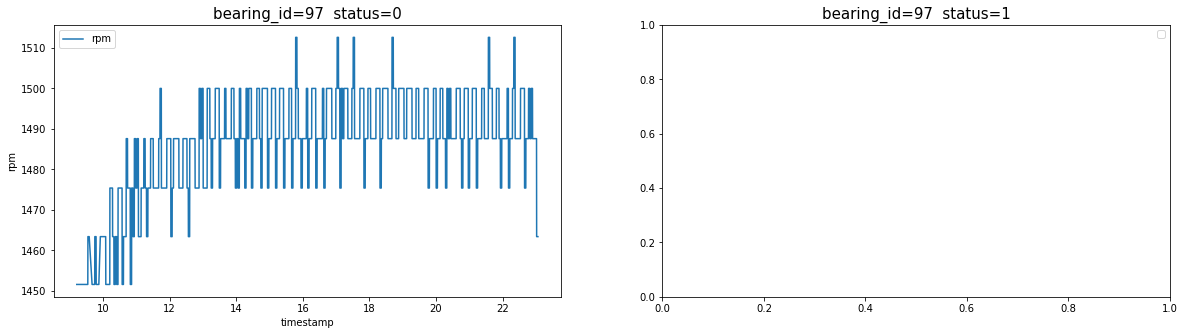

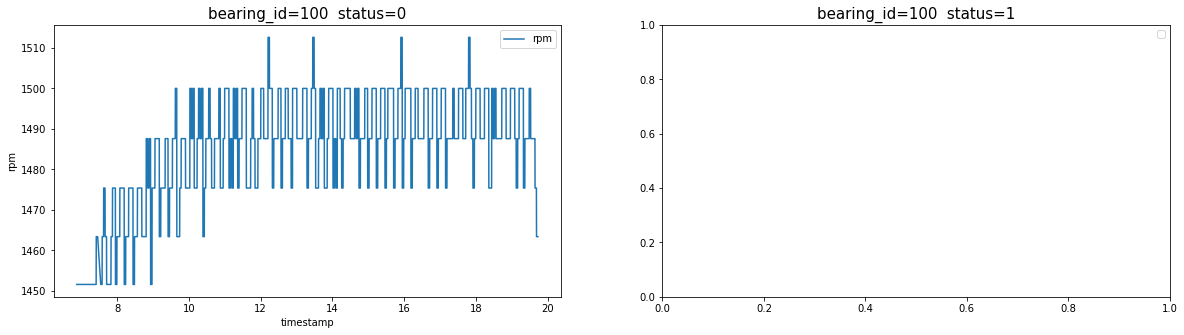

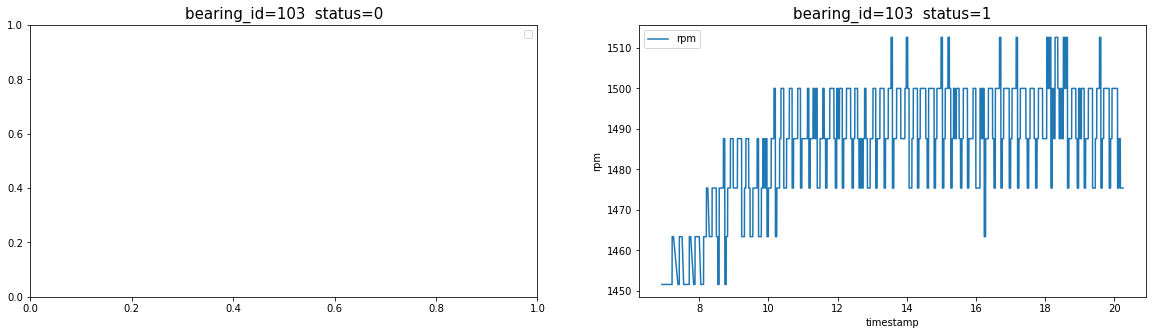

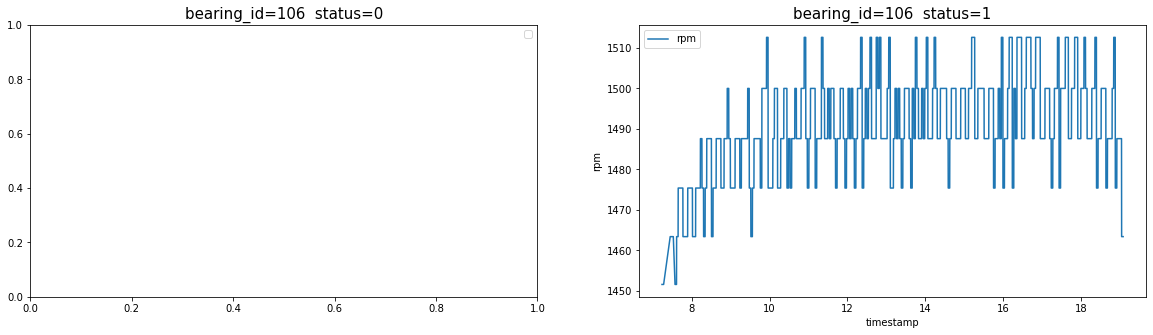

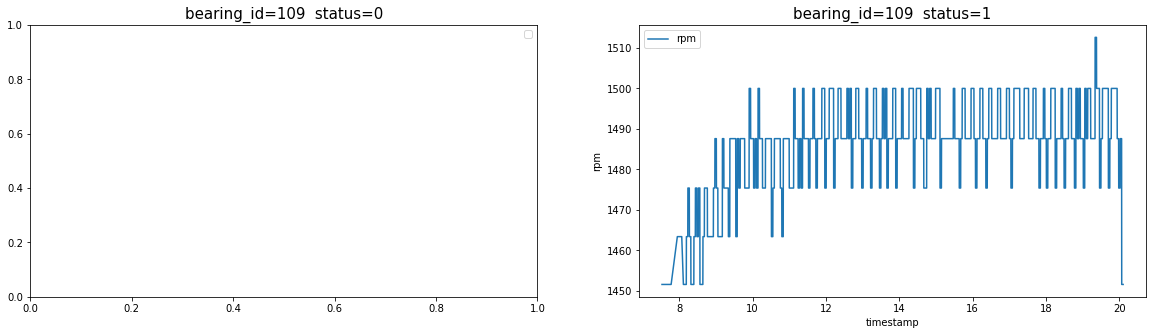

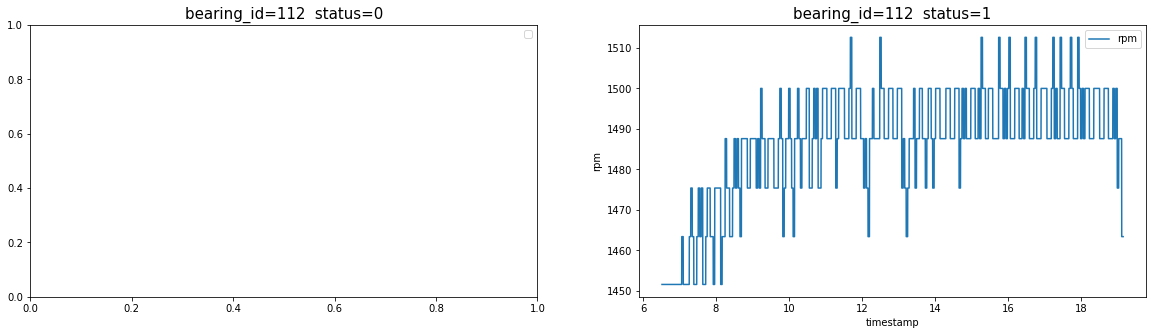

In [20]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df2[(df2['bearing_id'] == i) & (df2['status'] == 0)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['rpm'])
    df_36 = df2[(df2['bearing_id'] == i) & (df2['status'] == 1)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['rpm'])
    plt.show()

In [21]:
df3 = df[df['rpm'] > 1480]
df3.shape

(2961091, 13)

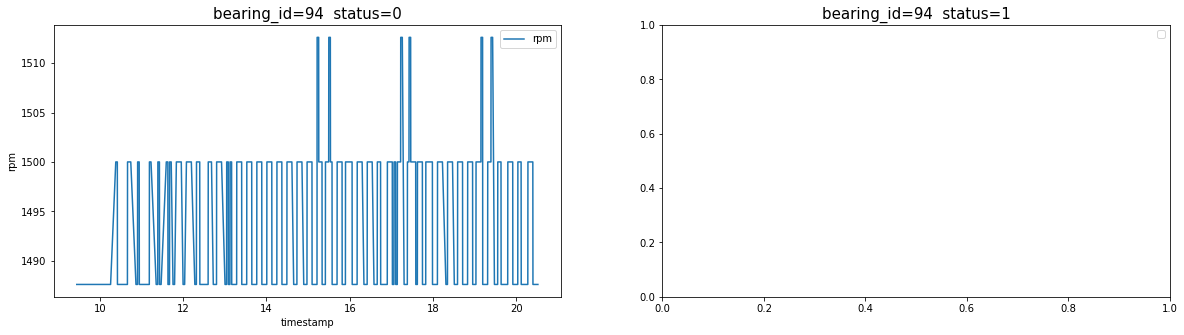

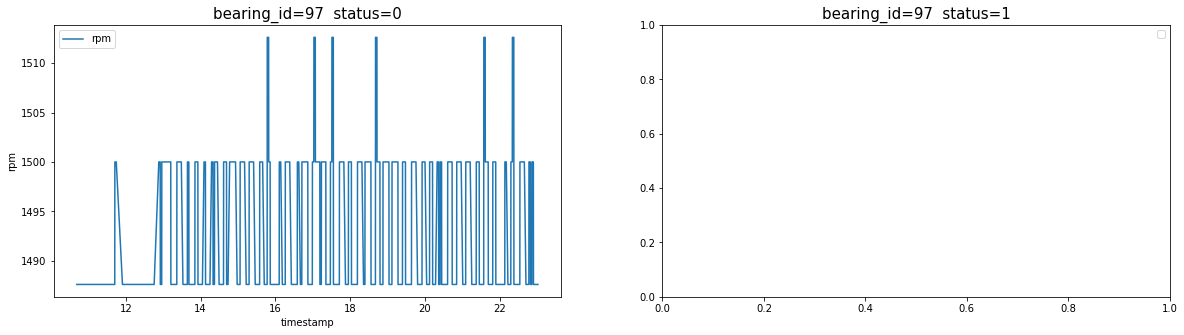

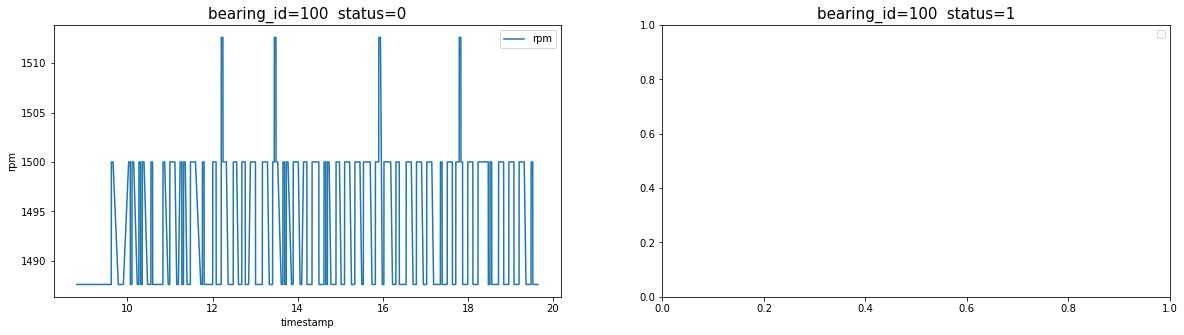

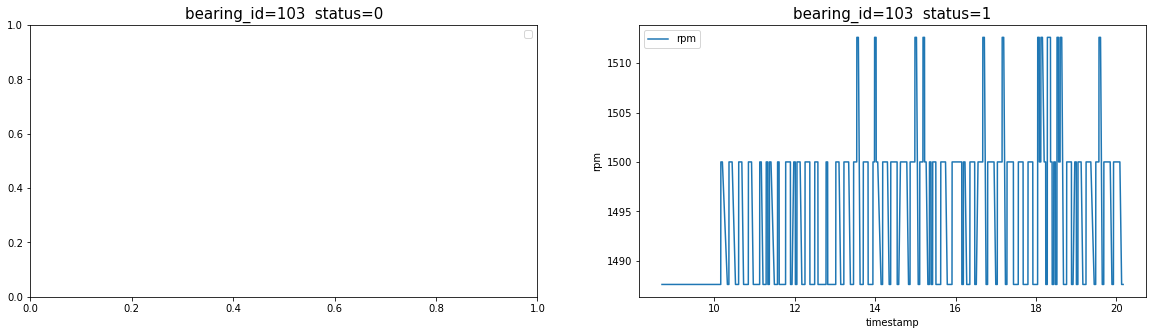

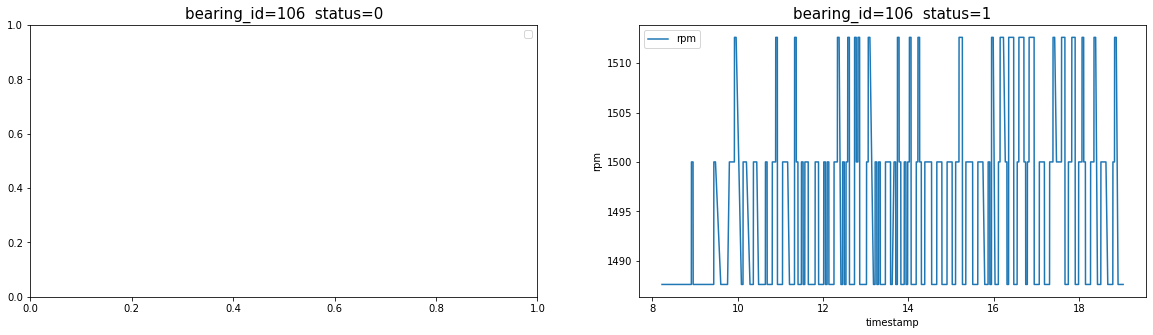

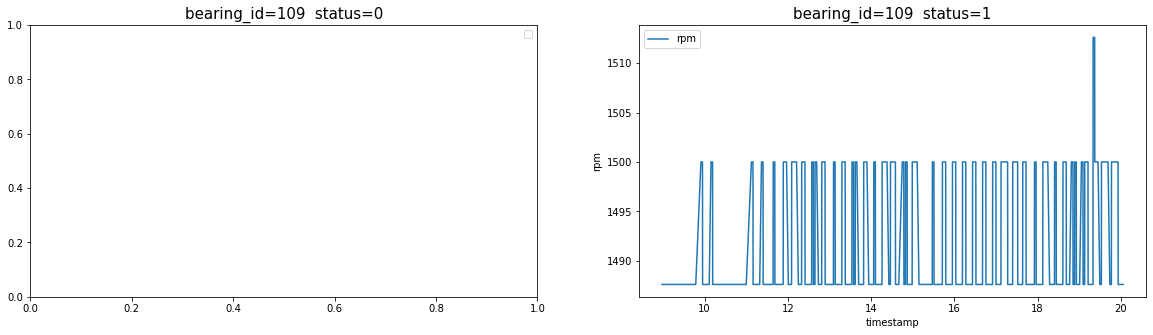

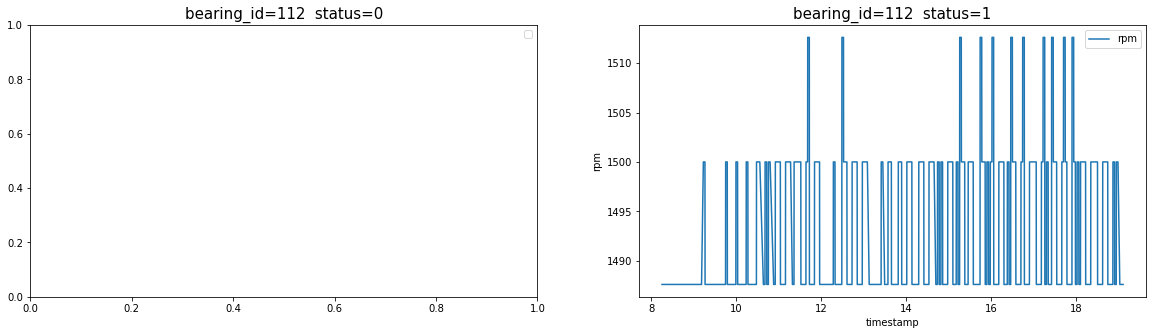

In [22]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df3[(df3['bearing_id'] == i) & (df3['status'] == 0)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['rpm'])
    df_36 = df3[(df3['bearing_id'] == i) & (df3['status'] == 1)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['rpm'])
    plt.show()

In [23]:
df4 = df[(df['timestamp'] >= 8) & (df['timestamp'] <= 18)]
df4.shape

(3360000, 13)

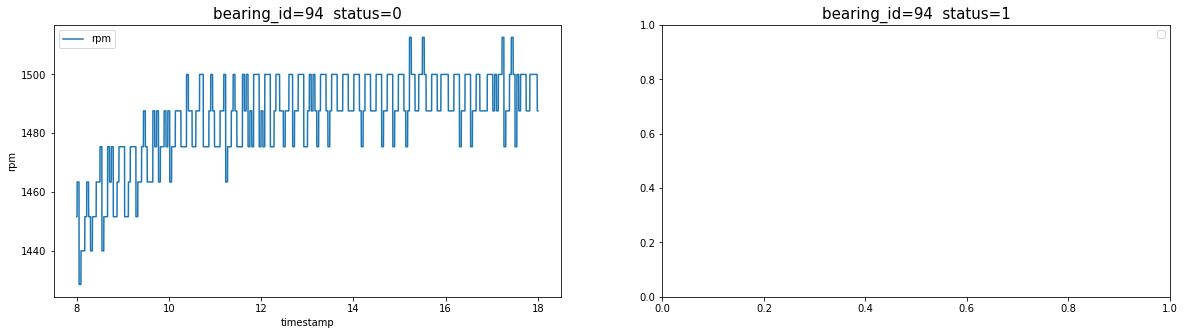

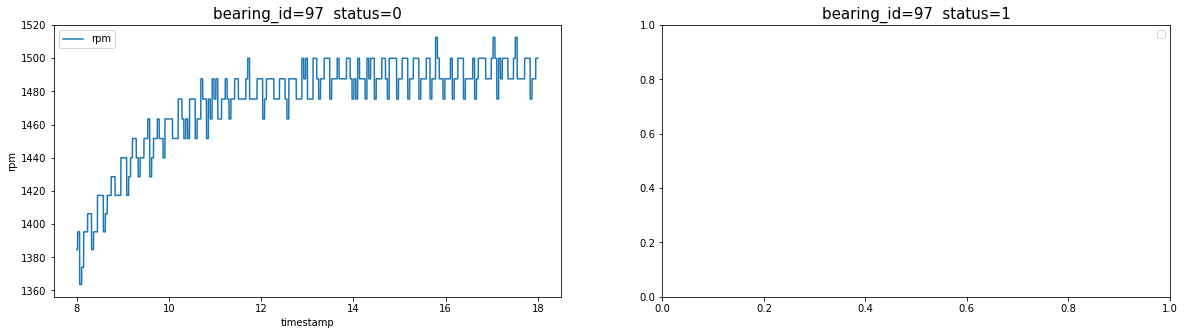

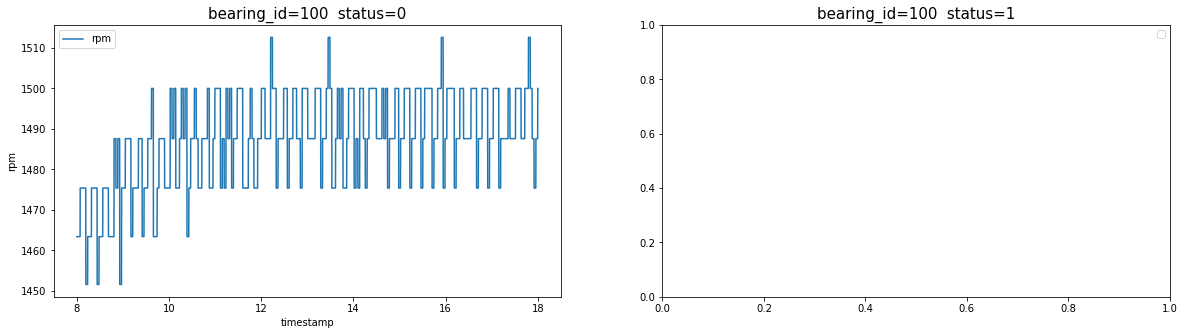

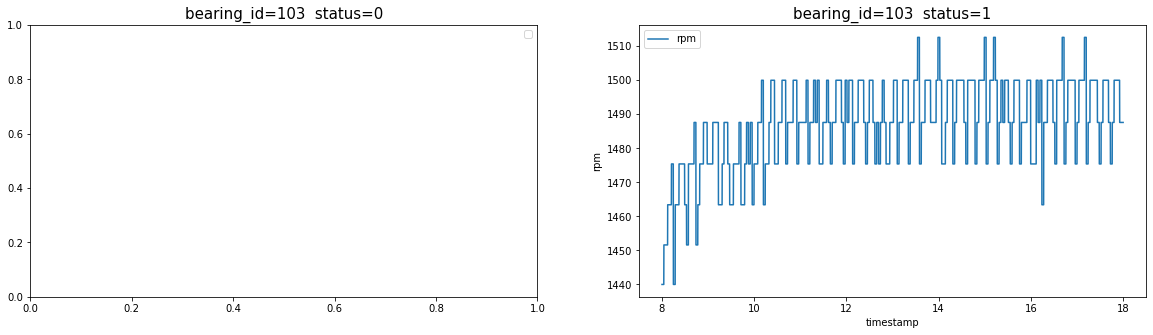

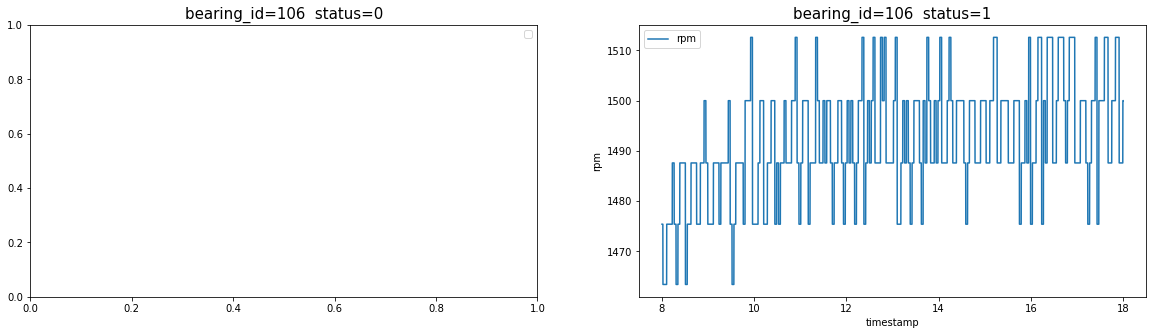

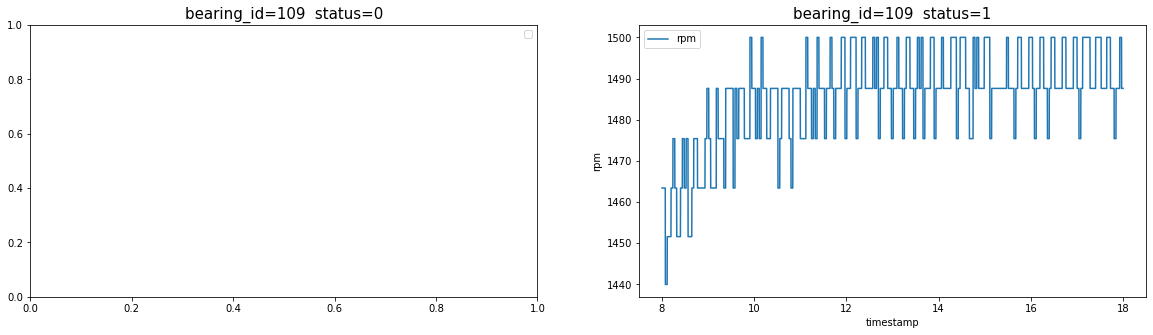

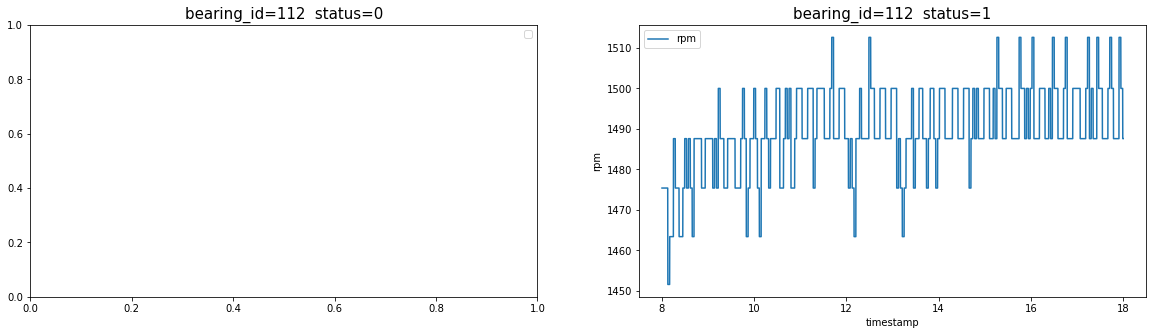

In [24]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df4[(df4['bearing_id'] == i) & (df4['status'] == 0)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['rpm'])
    df_36 = df4[(df4['bearing_id'] == i) & (df4['status'] == 1)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['rpm'])
    plt.show()

In [25]:
df5 = df[(df['timestamp'] >= 11) & (df['timestamp'] <= 15)]
df5.shape

(1344112, 13)

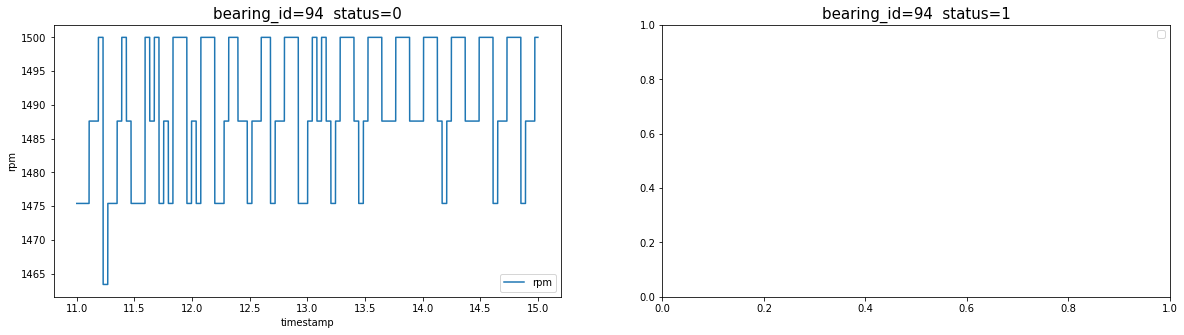

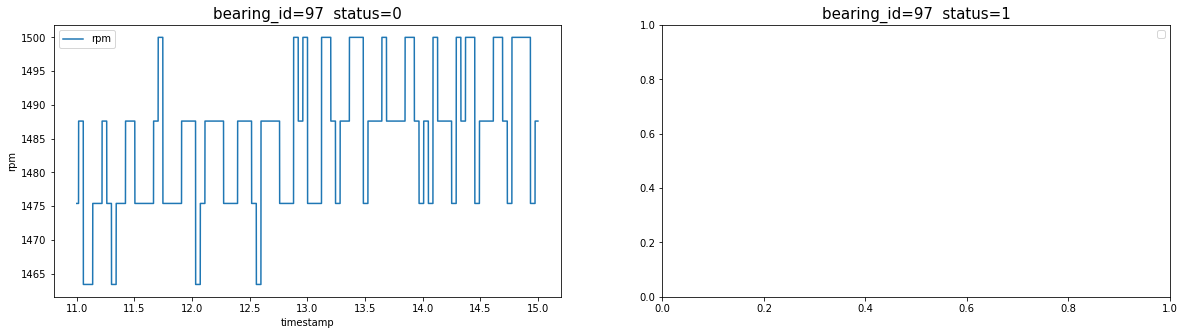

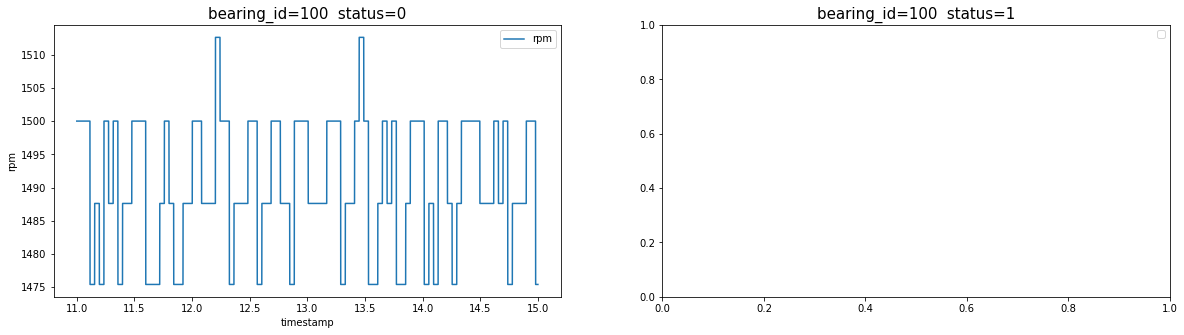

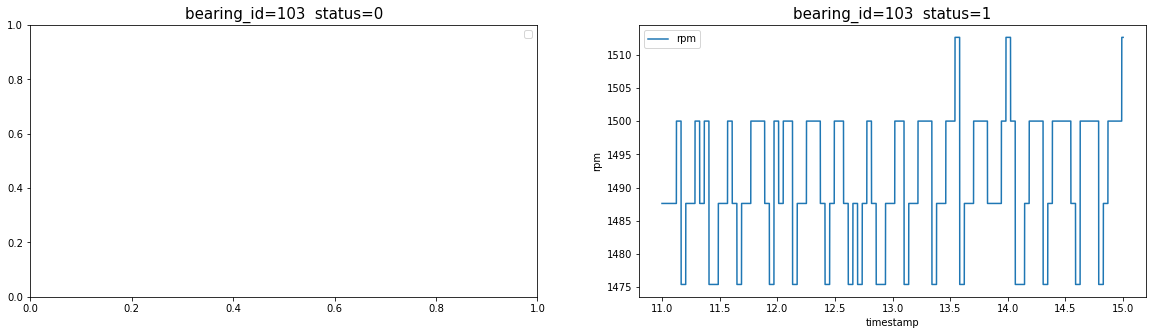

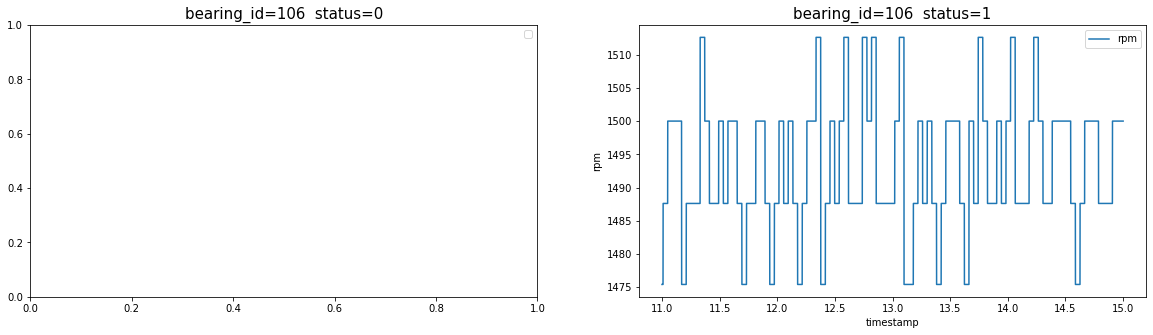

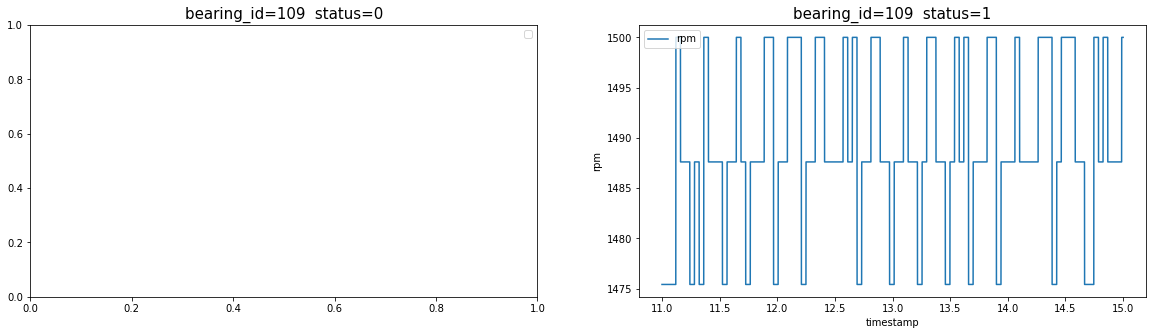

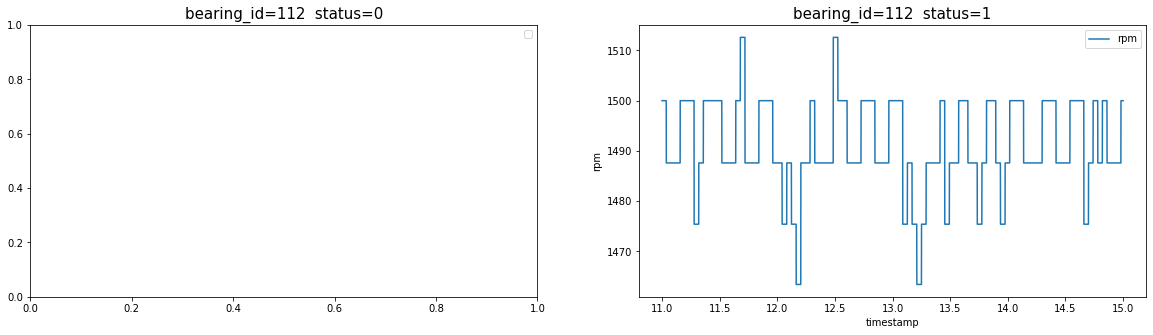

In [26]:
for i in range(94,113,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df5[(df5['bearing_id'] == i) & (df5['status'] == 0)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    ax1.legend(['rpm'])
    df_36 = df5[(df5['bearing_id'] == i) & (df5['status'] == 1)]
    sns.lineplot(y = 'rpm', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    ax2.legend(['rpm'])
    plt.show()

In [27]:
acceleration_cols = ['a1_x','a1_y','a1_z','a2_x','a2_y','a2_z']

In [67]:
from scipy.fft import fft, fftfreq, fftshift

In [29]:
acceleration_fft = fft(df[acceleration_cols].values)
acceleration_fft.shape

(10265700, 6)

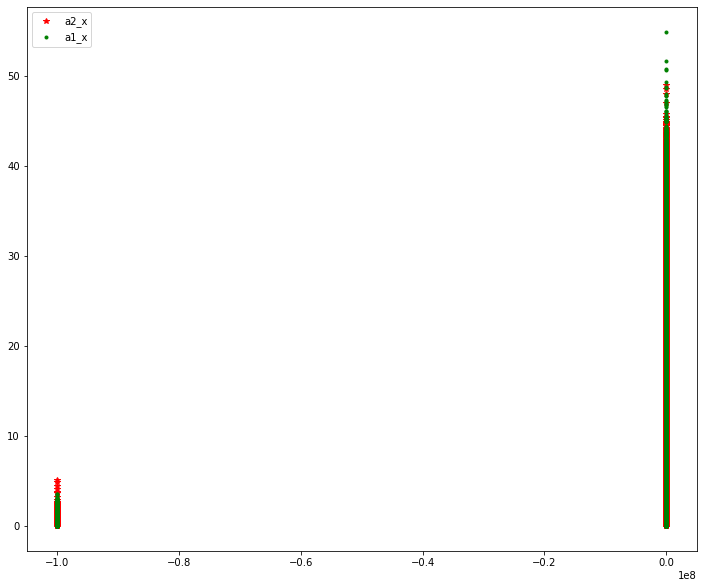

In [33]:
plt.figure(figsize=(12,10))
plt.plot(df['hz'].values, abs(acceleration_fft[:,3]), 'r*')
plt.plot(df['hz'].values, abs(acceleration_fft[:,0]), 'g.')
plt.legend(['a2_x','a1_x'])
plt.show()

In [38]:
acceleration_fft = fft(df4[acceleration_cols].values)
acceleration_fft.shape

(3360000, 6)

In [68]:
t = df4['timestamp'].values
freq = fftshift(fftfreq(t.shape[-1]))
freq.shape

(3360000,)

In [ ]:
signal =    #  np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)

In [65]:
df7 = df4
df7['a1_xfft'] = abs(acceleration_fft[:,0])
df7.head()

<ipython-input-65-abd2b624cd8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['a1_xfft'] = abs(acceleration_fft[:,0])


,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w,status,a1_xfft
24001,1,1,8.000333,-5.081331,-1.459080,-0.878530,0.380396,-0.189997,-0.143576,1440.0,24.0,0.423726,0,7.372120
24002,1,1,8.000667,-2.772620,-1.364446,0.081789,0.852418,0.194450,-0.243222,1440.0,24.0,0.543777,0,3.251632
24003,1,1,8.001000,-1.425872,-0.985908,0.946076,2.457291,0.002226,-0.940743,1440.0,24.0,0.543777,0,0.053070
24004,1,1,8.001333,0.498054,-0.512735,0.369884,2.740504,0.002226,-0.641806,1440.0,24.0,0.587117,0,2.456127
24005,1,1,8.001667,1.748606,-0.607370,-0.110275,3.590142,0.098338,-0.841097,1440.0,24.0,0.727107,0,3.878344


In [71]:
df7 = df4
df7['a1_yfft'] = abs(acceleration_fft[:,1])
df7['a1_zfft'] = abs(acceleration_fft[:,2])
df7['a2_xfft'] = abs(acceleration_fft[:,3])
df7['a2_yfft'] = abs(acceleration_fft[:,4])
df7['a2_zfft'] = abs(acceleration_fft[:,5])
df7.head()

<ipython-input-71-b4ecb251c210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['a1_yfft'] = abs(acceleration_fft[:,1])
<ipython-input-71-b4ecb251c210>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['a1_zfft'] = abs(acceleration_fft[:,2])
<ipython-input-71-b4ecb251c210>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w,status,a1_xfft,a1_yfft,a1_zfft,a2_xfft,a2_yfft,a2_zfft
24001,1,1,8.000333,-5.081331,-1.459080,-0.878530,0.380396,-0.189997,-0.143576,1440.0,24.0,0.423726,0,7.372120,5.985915,3.408864,4.927599,3.408864,5.985915
24002,1,1,8.000667,-2.772620,-1.364446,0.081789,0.852418,0.194450,-0.243222,1440.0,24.0,0.543777,0,3.251632,4.690337,1.528607,1.741131,1.528607,4.690337
24003,1,1,8.001000,-1.425872,-0.985908,0.946076,2.457291,0.002226,-0.940743,1440.0,24.0,0.543777,0,0.053070,5.377261,1.745226,1.008210,1.745226,5.377261
24004,1,1,8.001333,0.498054,-0.512735,0.369884,2.740504,0.002226,-0.641806,1440.0,24.0,0.587117,0,2.456127,3.036403,3.635649,0.715798,3.635649,3.036403
24005,1,1,8.001667,1.748606,-0.607370,-0.110275,3.590142,0.098338,-0.841097,1440.0,24.0,0.727107,0,3.878344,2.559894,6.081028,0.405007,6.081028,2.559894


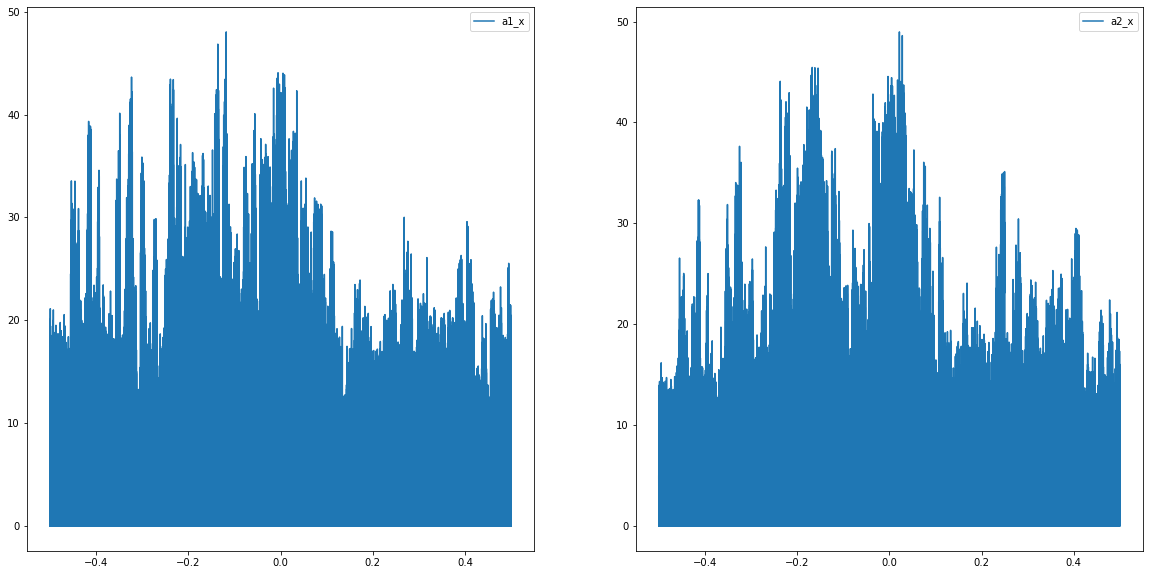

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.plot(freq, abs(acceleration_fft[:,0])) #df4['hz'].values
ax1.legend(['a1_x'])
ax2.plot(freq, abs(acceleration_fft[:,3]))
ax2.legend(['a2_x'])
plt.show()

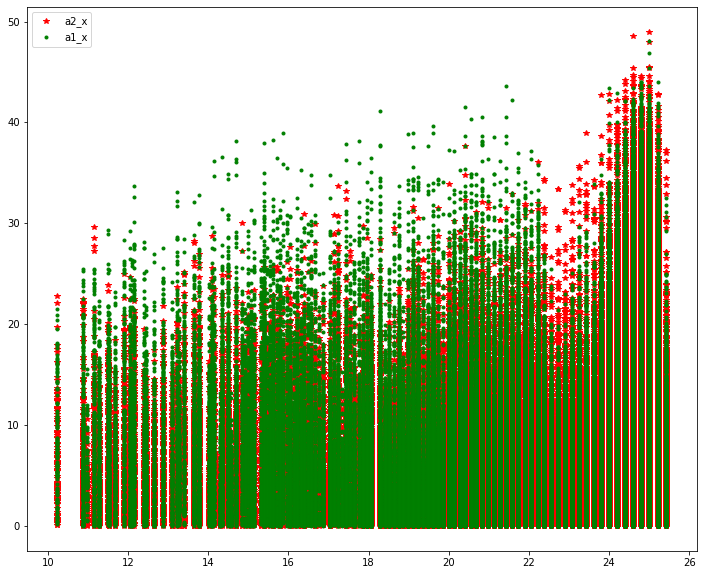

In [41]:
plt.figure(figsize=(12,10))
plt.plot(df4['hz'].values, abs(acceleration_fft[:,3]), 'r*')
plt.plot(df4['hz'].values, abs(acceleration_fft[:,0]), 'g.')
plt.legend(['a2_x','a1_x'])
plt.show()

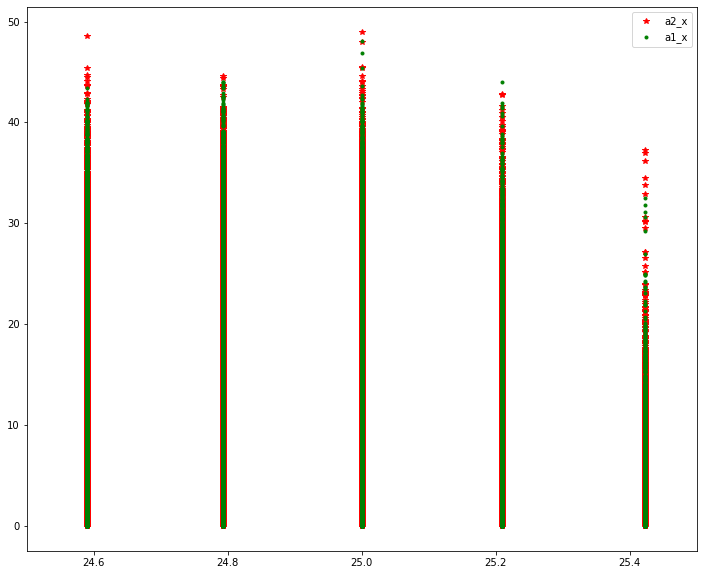

In [44]:
plt.figure(figsize=(12,10))
plt.plot(df4['hz'].values, abs(acceleration_fft[:,3]), 'r*')
plt.plot(df4['hz'].values, abs(acceleration_fft[:,0]), 'g.')
plt.legend(['a2_x','a1_x'])
plt.xlim([24.5,25.5])
plt.show()

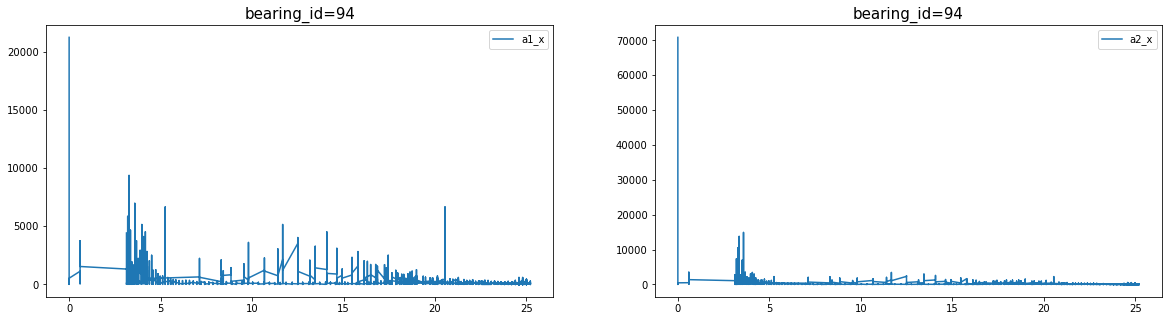

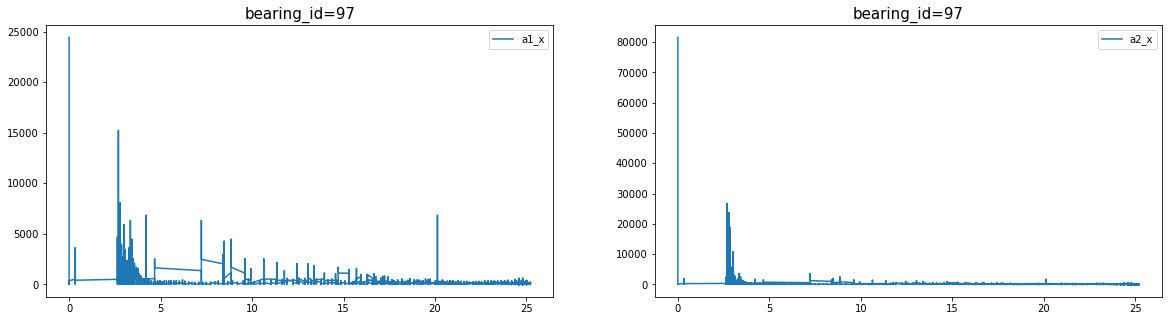

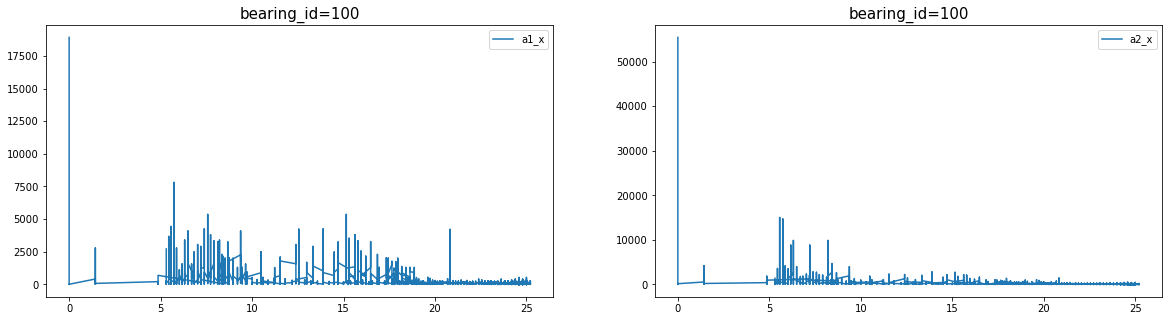

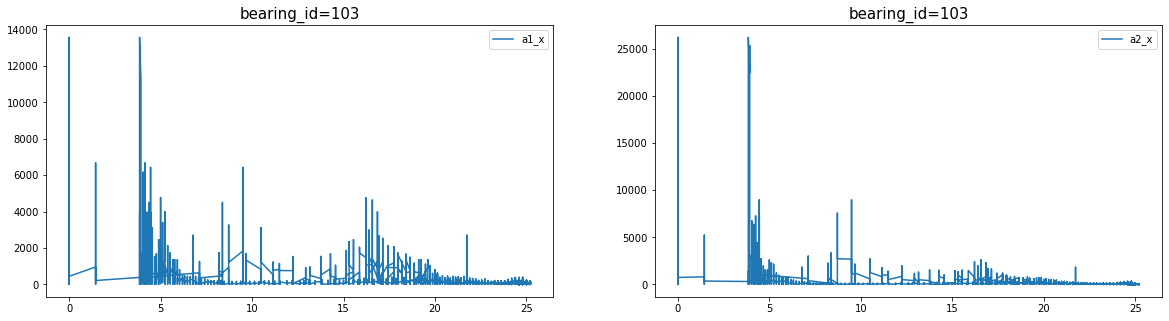

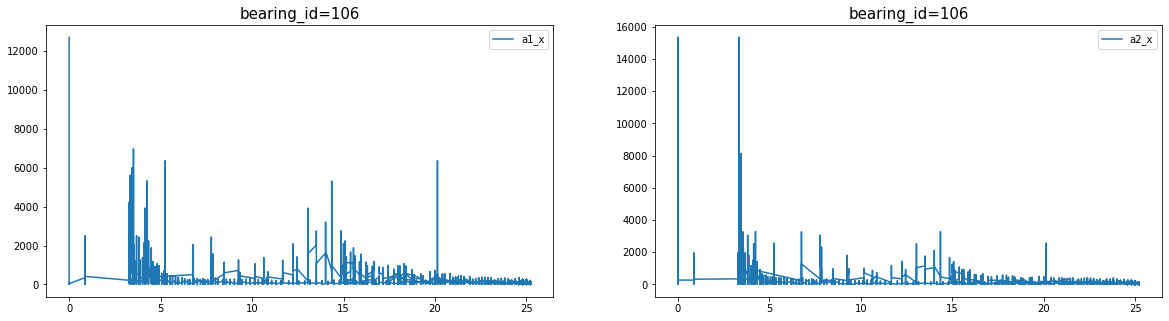

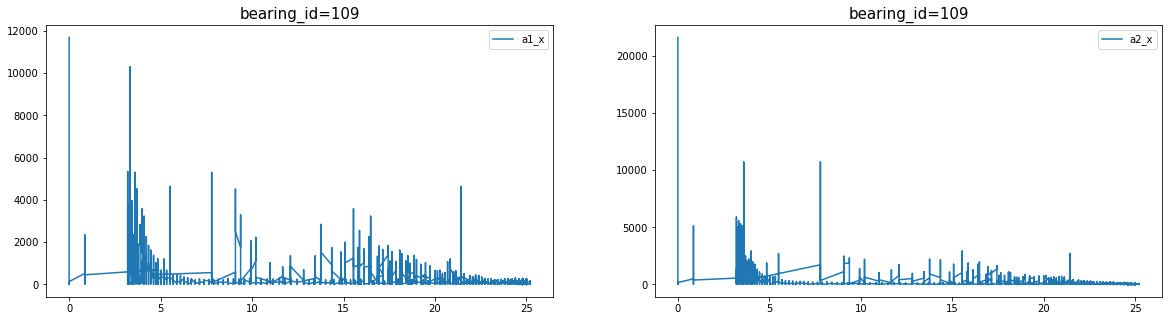

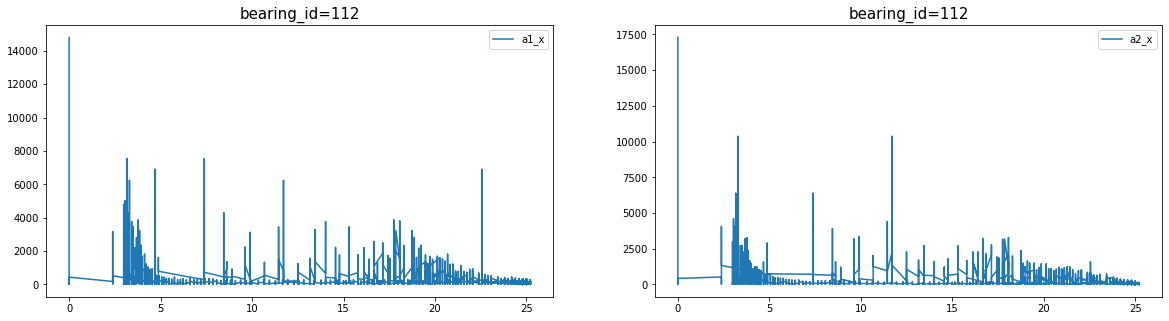

In [50]:
for i in range(94,113,3):
    df6 = df[(df['bearing_id'] == i)]  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1.plot(df6['hz'].values, abs(fft(df6['a1_x'].values)))
    ax1.set_title(f'bearing_id={i}', fontsize = 15)
    ax1.legend(['a1_x'])
    ax2.plot(df6['hz'].values, abs(fft(df6['a2_x'].values)))
    ax2.set_title(f'bearing_id={i}', fontsize = 15)
    ax2.legend(['a2_x'])
    plt.show()

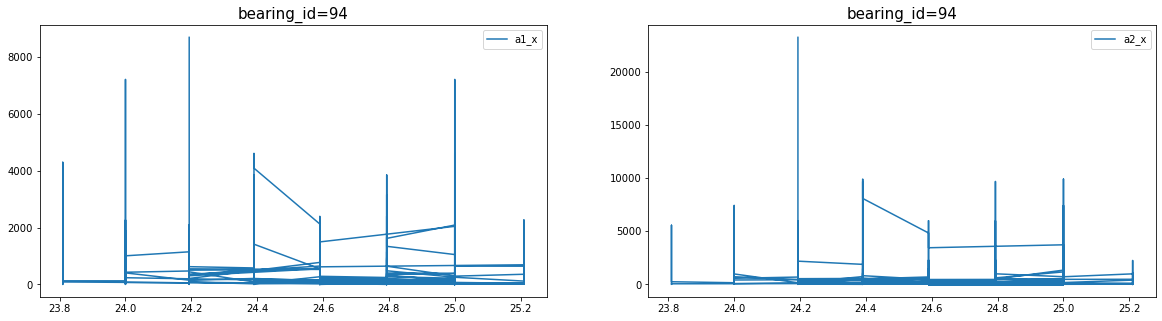

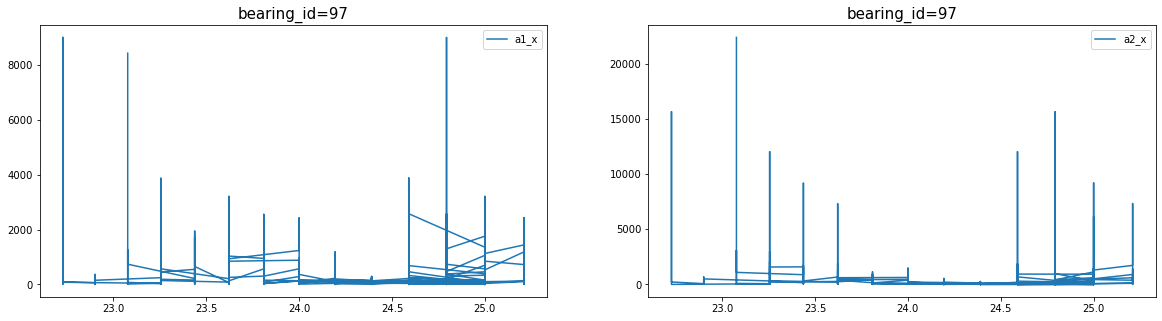

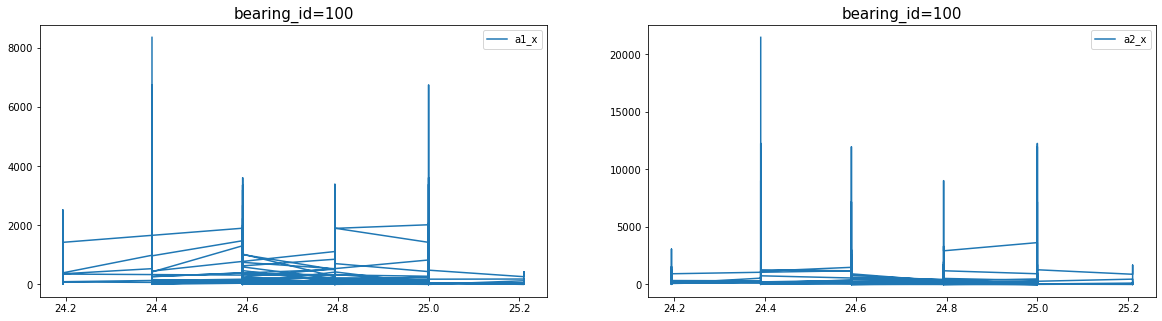

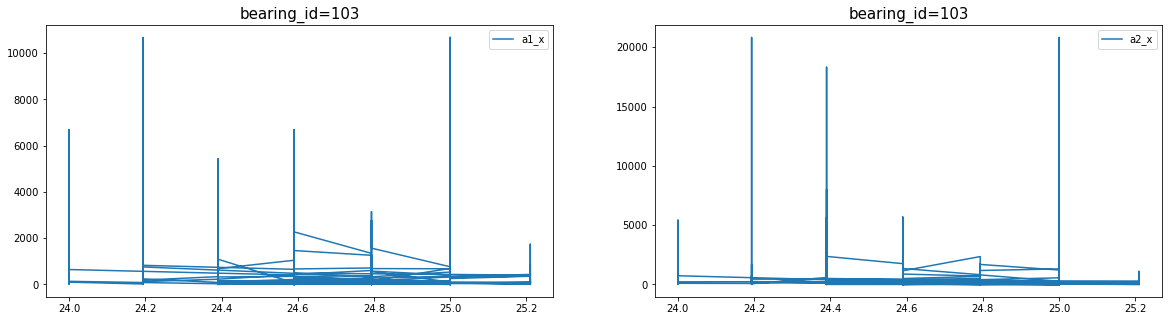

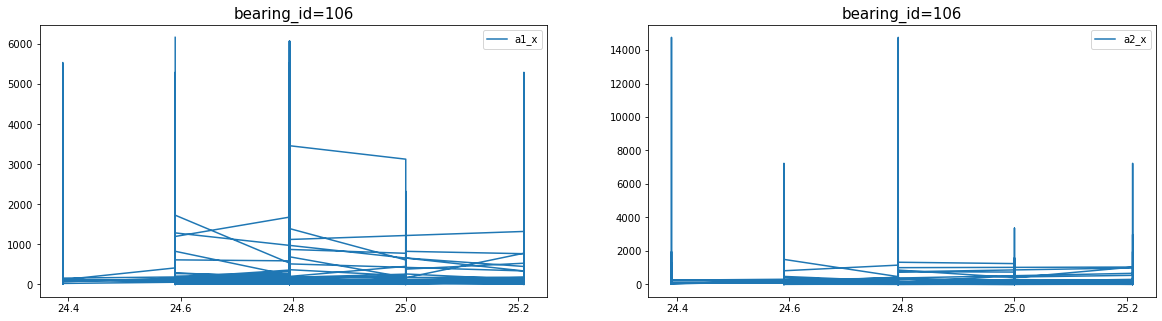

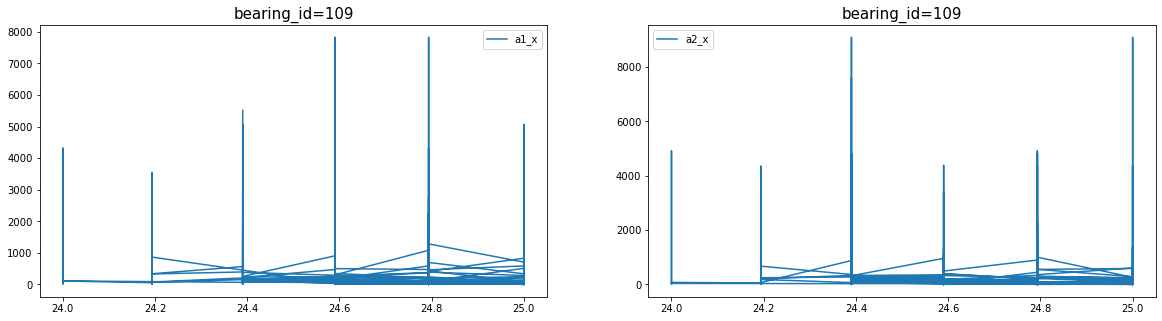

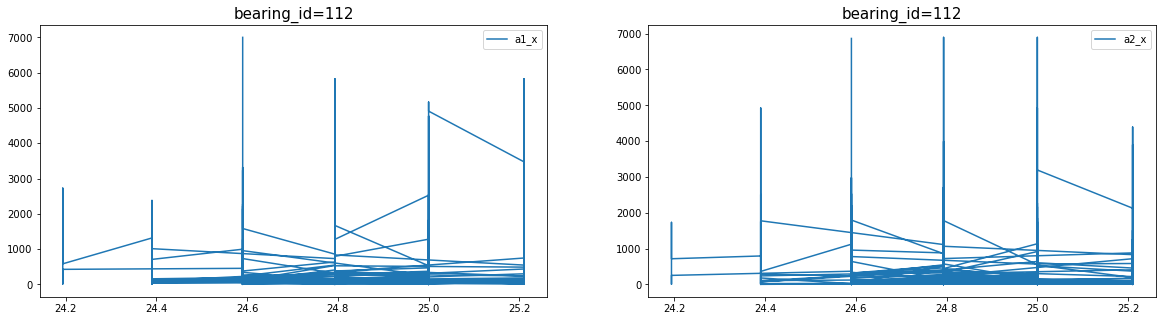

In [51]:
for i in range(94,113,3):
    df6 = df4[(df4['bearing_id'] == i)]  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1.plot(df6['hz'].values, abs(fft(df6['a1_x'].values)))
    ax1.set_title(f'bearing_id={i}', fontsize = 15)
    ax1.legend(['a1_x'])
    ax2.plot(df6['hz'].values, abs(fft(df6['a2_x'].values)))
    ax2.set_title(f'bearing_id={i}', fontsize = 15)
    ax2.legend(['a2_x'])
    plt.show()

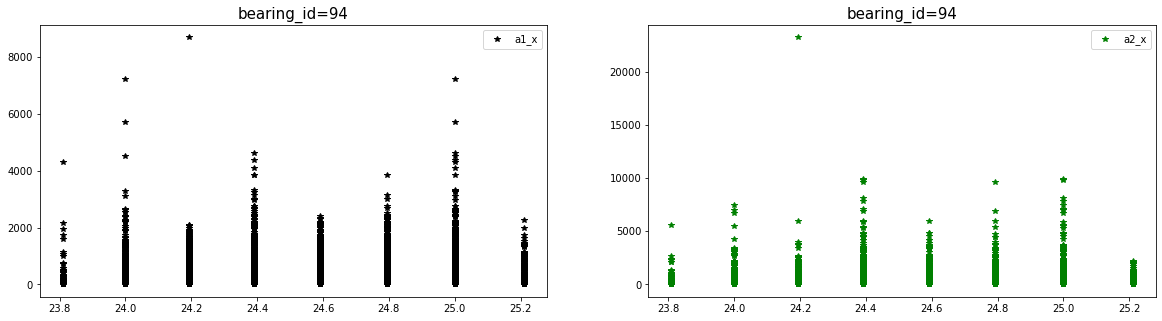

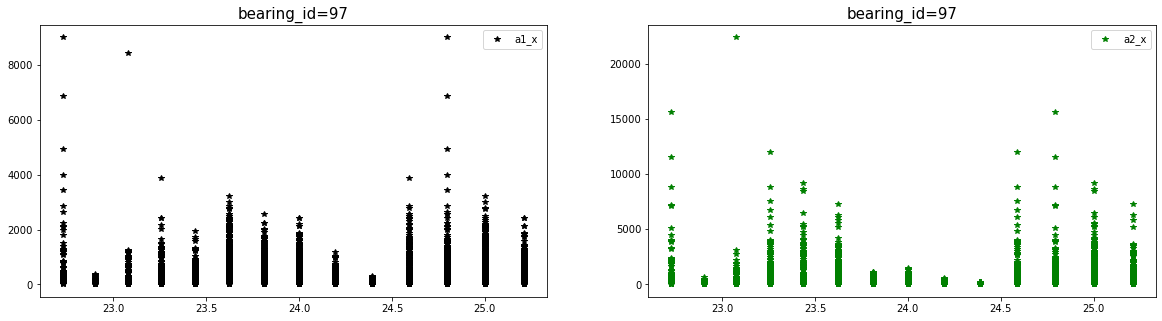

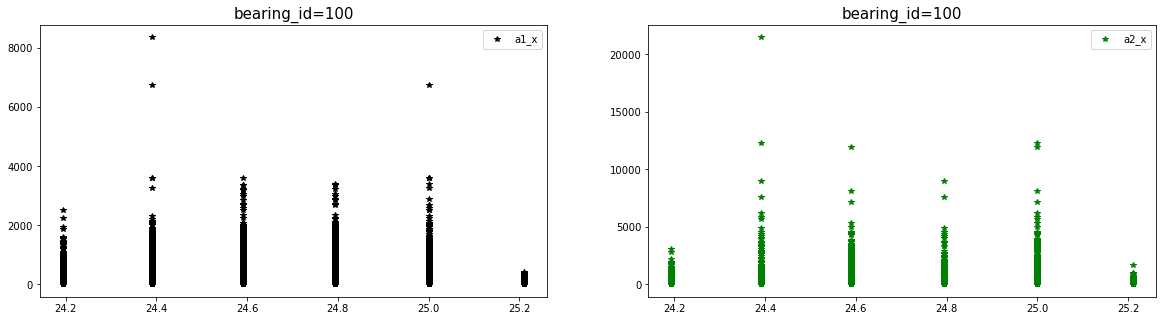

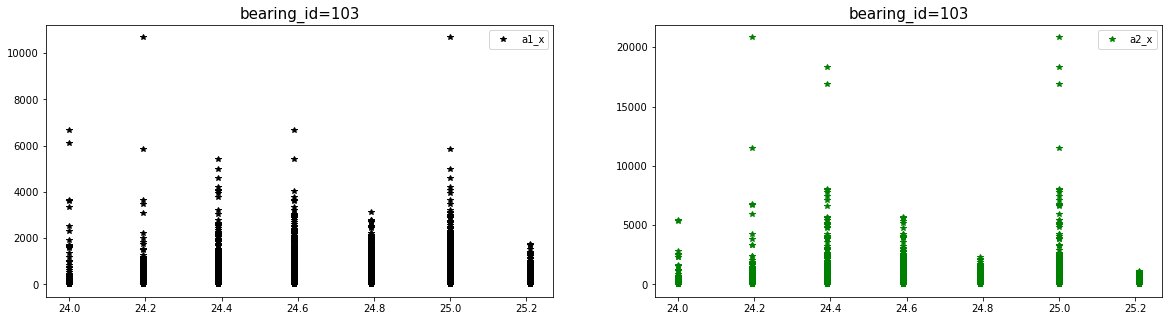

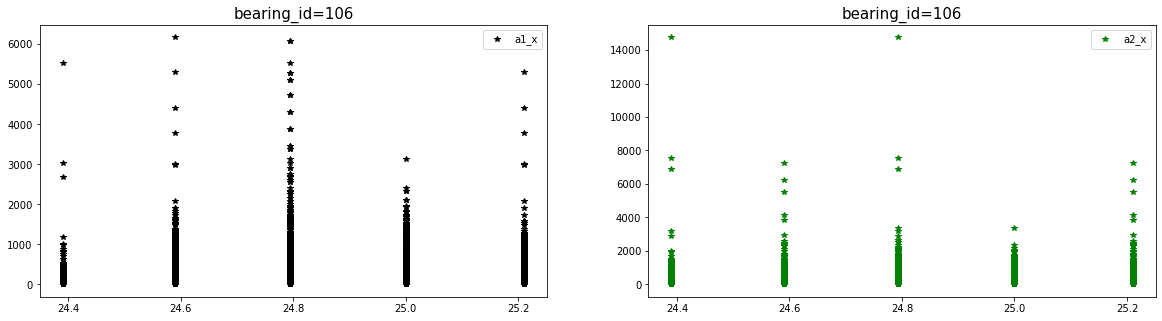

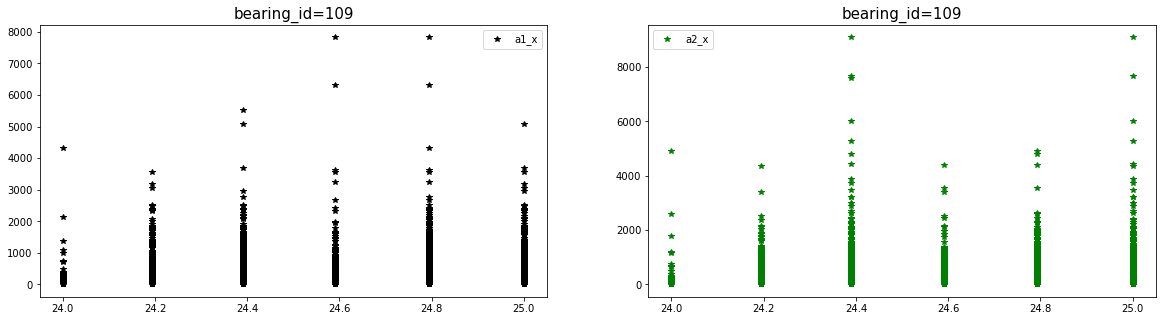

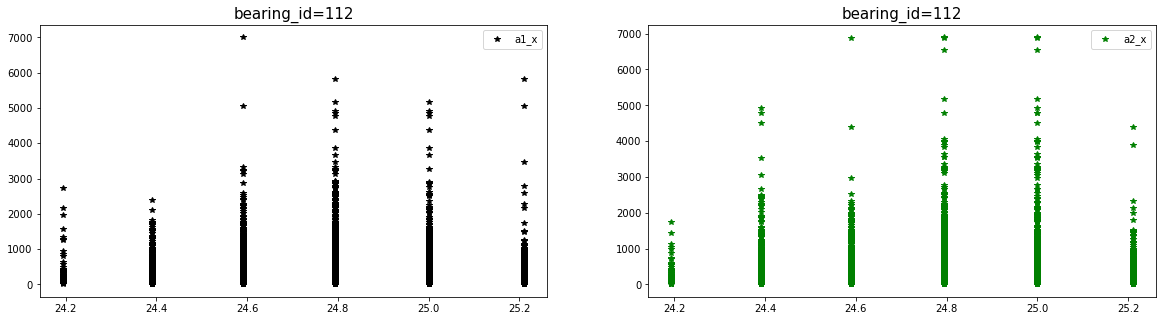

In [53]:
for i in range(94,113,3):
    df6 = df4[(df4['bearing_id'] == i)]  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1.plot(df6['hz'].values, abs(fft(df6['a1_x'].values)), 'k*')
    ax1.set_title(f'bearing_id={i}', fontsize = 15)
    ax1.legend(['a1_x'])
    ax2.plot(df6['hz'].values, abs(fft(df6['a2_x'].values)), 'g*')
    ax2.set_title(f'bearing_id={i}', fontsize = 15)
    ax2.legend(['a2_x'])
    plt.show()

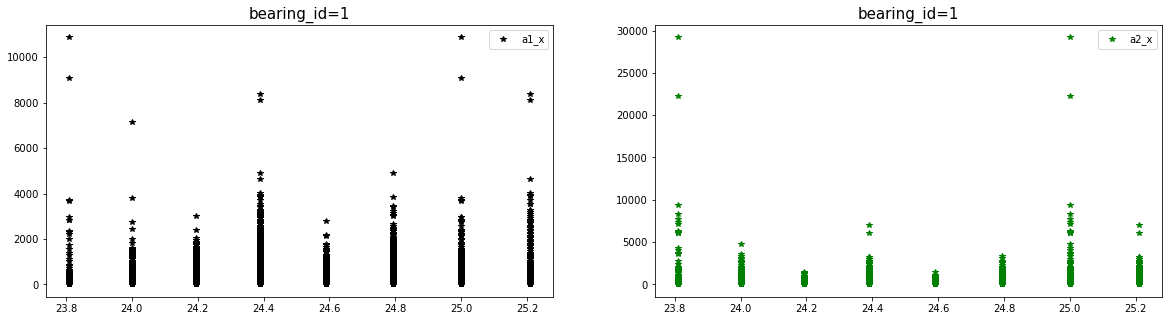

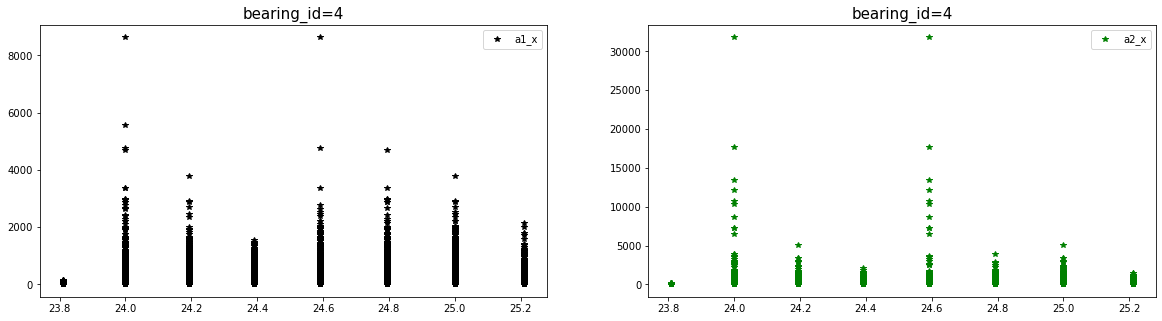

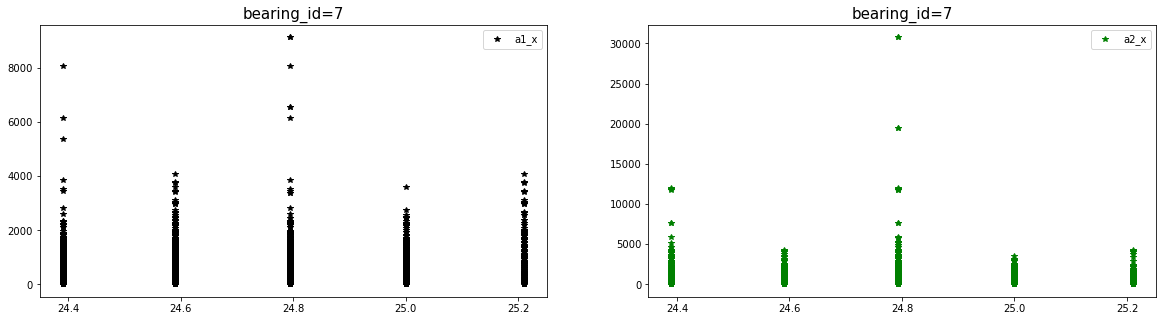

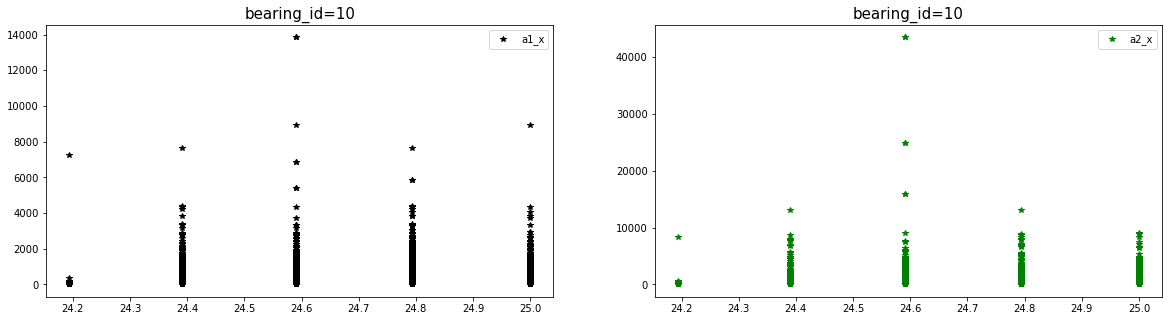

In [54]:
for i in range(1,12,3):
    df6 = df4[(df4['bearing_id'] == i)]  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1.plot(df6['hz'].values, abs(fft(df6['a1_x'].values)), 'k*')
    ax1.set_title(f'bearing_id={i}', fontsize = 15)
    ax1.legend(['a1_x'])
    ax2.plot(df6['hz'].values, abs(fft(df6['a2_x'].values)), 'g*')
    ax2.set_title(f'bearing_id={i}', fontsize = 15)
    ax2.legend(['a2_x'])
    plt.show()